# DFTpy for bulk Al

## March  28, 2023

### Import needed DFTpy modules

In [1]:
import numpy as np

from dftpy.grid import DirectGrid
from dftpy.field import DirectField
from dftpy.functional import Functional, TotalFunctional
from dftpy.functional.abstract_functional import AbstractFunctional
from dftpy.functional.functional_output import FunctionalOutput
from dftpy.optimization import Optimization
from dftpy.constants import LEN_CONV, ENERGY_CONV
from dftpy.ions import Ions
from dftpy.math_utils import ecut2nr

In [2]:
from ase.build import bulk
from ase.io import read

In [3]:
from ase.spacegroup import crystal

In [4]:
import os
os.chdir('../..')
path_file = os.getcwd()

In [5]:
import h5py
file = h5py.File(path_file+"/organize_data/Data_phases.hdf5", "r")
fileX = file["Descriptor"]
rho0_KE_WT = file["rho0_KE_wt"]
rho0_TE_WT = file["rho0_TE_wt"]
rho0_DEN_WT = file["rho0_DEN_wt"]

rho0_KE_wt =[]
rho0_TE_wt =[]
rho0_DEN_wt=[]
rho = []
for i in np.arange(0,280):
    rho0_KE_wt.append(rho0_KE_WT[i][0]) 
    rho0_TE_wt.append(rho0_TE_WT[i][0]) 
    rho0_DEN_wt.append(rho0_DEN_WT[i][0])
file.close()
rho0_Btin_KE_wt = rho0_KE_wt[0:30];rho0_fcc_KE_wt = rho0_KE_wt[30:60];rho0_bcc_KE_wt = rho0_KE_wt[60:90];rho0_cd_KE_wt = rho0_KE_wt[90:120];rho0_dhcp_KE_wt = rho0_KE_wt[120:150];rho0_Btin_hd_KE_wt = rho0_KE_wt[150:180];rho0_rand4_KE_wt = rho0_KE_wt[180:185];rho0_rand8_KE_wt = rho0_KE_wt[185:190];rho0_bct5_KE_wt = rho0_KE_wt[190:220];rho0_hcp_KE_wt = rho0_KE_wt[220:250];rho0_sh_KE_wt = rho0_KE_wt[250:280]

rho0_Btin_TE_wt = rho0_TE_wt[0:30];rho0_fcc_TE_wt = rho0_TE_wt[30:60];rho0_bcc_TE_wt = rho0_TE_wt[60:90];rho0_cd_TE_wt = rho0_TE_wt[90:120];rho0_dhcp_TE_wt = rho0_TE_wt[120:150];rho0_Btin_hd_TE_wt = rho0_TE_wt[150:180];rho0_rand4_TE_wt = rho0_TE_wt[180:185];rho0_rand8_TE_wt = rho0_TE_wt[185:190];rho0_bct5_TE_wt = rho0_TE_wt[190:220];rho0_hcp_TE_wt = rho0_TE_wt[220:250];rho0_sh_TE_wt = rho0_TE_wt[250:280]

rho0_Btin_DEN_wt = rho0_DEN_wt[0:30];rho0_fcc_DEN_wt = rho0_DEN_wt[30:60];rho0_bcc_DEN_wt = rho0_DEN_wt[60:90];rho0_cd_DEN_wt = rho0_DEN_wt[90:120];rho0_dhcp_DEN_wt = rho0_DEN_wt[120:150];rho0_Btin_hd_DEN_wt = rho0_DEN_wt[150:180];rho0_rand4_DEN_wt = rho0_DEN_wt[180:185];rho0_rand8_DEN_wt = rho0_DEN_wt[185:190];rho0_bct5_DEN_wt = rho0_DEN_wt[190:220];rho0_hcp_DEN_wt = rho0_DEN_wt[220:250];rho0_sh_DEN_wt = rho0_DEN_wt[250:280]

In [6]:
# 'Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_cd', 'Si_dhcp', 'Si_hcp', 'Si_bct5', 'Si_cbcc', 'Si_sh'
# rho0_TE = [rho0_Btin_TE_wt, rho0_fcc_TE_wt, rho0_bcc_TE_wt, rho0_cd_TE_wt, rho0_dhcp_TE_wt, 'Si_hcp', 'Si_bct5', 'Si_cbcc', 'Si_sh']
# rho0_KE = [rho0_Btin_KE_wt, rho0_fcc_KE_wt, rho0_bcc_KE_wt, rho0_cd_KE_wt, rho0_dhcp_KE_wt, rho0_hcp_TE_wt, rho0_bct5_TE_wt, rho0_sh_TE_wt]
# rho0_DEN = [rho0_Btin_DEN_wt, rho0_fcc_DEN_wt, rho0_bcc_DEN_wt, rho0_cd_DEN_wt]

### Define FFT grid and guess UEG density

In [7]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [8]:
# dictionary = {
#     'Si_Btin': {'structure': 'diamond', 'charge': '4'}, 
#     'Si_fcc': {'structure': 'fcc', 'lattice': '3.405', 'charge': '4'},
#     'Si_bcc': {'structure': 'bcc', 'lattice': '3.09', 'charge': '4'},
#     'Si_cd': {'structure': 'diamond', 'lattice': '5.43', 'charge': '4'},

# }
# Phases = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_cd'] # remove fcc, and include in the test HD
# Volume = []
# Cwt_energy = []
# Pred_energy = []
# Real_rho0 = []
# Pred_rho0 = []
# Ks_energy = []
# for i,p in enumerate(Phases):
#     print(Phases[i])
   
#     if Phases[i] == 'Si_Btin':
#             ions = crystal('Si',[(0,0,0)],spacegroup=141,cellpar = [4.81,4.81,2.65, 90,90,90])
#     else:
#         ions = bulk('Si', dictionary[Phases[i]]['structure'], a=float(dictionary[Phases[i]]['lattice']), cubic=True)
        
#     ions.write(str(Phases[i])+'.vasp')

In [9]:
dictionary = {
    'Si_Btin': {'file': 'Si_Btin.vasp'}, 
    'Si_fcc': {'file': 'Si_fcc.vasp'},
    'Si_bcc': {'file': 'Si_bcc.vasp'},
    'Si_cd': {'file': 'Si_cd.vasp'},
    'Si_dhcp': {'file': 'Si_dhcp.vasp'},
    'Si_hcp': {'file': 'Si_hcp.vasp'},
    'Si_bct5': {'file': 'Si_bct5.vasp'},
    'Si_sh': {'file': 'Si_sh.vasp'},
    'Si_cbcc': {'file': 'Si_cbcc.vasp'},
}


In [12]:
def get_rho_ini(phase):
    inputfile = path_file+'/Results/Structures/'+dictionary[phase]['file']
    ions = Ions.from_ase(read(inputfile, format='vasp'))
    nr = ecut2nr(ecut=25, lattice=ions.cell)
    grid = DirectGrid(lattice=ions.cell, nr=[32, 32, 60])

    pseudo = Functional(type='PSEUDO', grid = grid, ions=ions, PP_list=PP_list)
    rho_ini = DirectField(grid=grid)
    rho_ini[:] = ions.get_ncharges()/ions.cell.volume
    return rho_ini, grid, pseudo, ions

In [13]:
Phases = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_cd', 'Si_dhcp', 'Si_hcp', 'Si_bct5', 'Si_sh']   
# Phases = ['Si_bct5']
Rho_ini = []
Grid = []
Pseudo = []
IONS = []
for i,phase in enumerate(Phases):
    rho_ini, grid, pseudo, ions = get_rho_ini(phase)
    Rho_ini.append(rho_ini)
    Grid.append(grid)
    Pseudo.append(pseudo)
    IONS.append(ions)

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf


### Define level of theory (XC, KEDF, etc)

In [14]:
class ExternalPotential(AbstractFunctional):
    
    def __init__(self, potential, name='EXT', type='EXT', **kwargs):
        self.potential = potential
        self.name = name
        self.type = type
        
    def compute(self, density, **kwargs):
        energy = np.sum(density*self.potential)*density.grid.dV
        functional=FunctionalOutput(name=self.name, potential=self.potential, energy=energy)
        return functional

In [15]:
A = 0.01
q = np.zeros(3)
j_h=5
V = []
Vext = []
# q[:] = 2*np.pi / grid.cell.lengths()
for i,phase in enumerate(Phases):
    q[0] = 2*np.pi / Grid[i].cell.lengths()[0] # only x direction
    v = 2 * A * np.cos(np.einsum('i,ijkl->jkl', j_h*q, Grid[i].r))
    
    vext = ExternalPotential(v)
    V.append(v)
    Vext.append(vext)

### Optimize the density

In [16]:
xc = Functional(type='XC',name='LDA')
hartree = Functional(type='HARTREE')

In [17]:
rho0_KE_wt_cd = np.linspace(0.015,0.1,20)
rho_opt = []
rho_vext = []
toten_diff = []
kin_diff = []
for i,phase in enumerate(Phases):
    for j in np.arange(0,20):
        ke = Functional(type='KEDF',name='WT', rho0= rho0_KE_wt_cd[j])
        evaluator = TotalFunctional(KE=ke, XC=xc, HARTREE=hartree, PSEUDO=Pseudo[i])
        optimization_options = {'econv' : 1e-7}
        opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options,
                optimization_method = 'TN')

        Rho_opt = opt.optimize_rho(guess_rho=Rho_ini[i])
        rho_opt.append(Rho_opt)
        energy_opt = evaluator.Energy(rho=Rho_opt, ions=IONS[i])
        ke_opt = ke(Rho_opt).energy
        ### Total functional with vext

        
        totalfunctional_vext = TotalFunctional(KE=ke, XC=xc, HARTREE=hartree, PSEUDO=Pseudo[i], EXT = Vext[i])
        optimization_options = {
            'econv' : 1e-7, # Energy Convergence (a.u./atom)
            'maxfun' : 50,   # For TN method, it's the max steps for searching direction
            'maxiter' : 50, # The max steps for optimization
            }

        opt_vext = Optimization(EnergyEvaluator=totalfunctional_vext, optimization_options = optimization_options,
            optimization_method = 'TN')
        Rho_vext = opt_vext.optimize_rho(guess_rho=Rho_opt)
        energy_vext = totalfunctional_vext.Energy(rho=Rho_vext, ions=IONS[i])
        ke_vext = ke(Rho_vext).energy
        rho_vext.append(Rho_vext)
        toten_diff.append(energy_opt-energy_vext)
        kin_diff.append(ke_opt-ke_vext)

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.516417275998E+01     -1.516417E+01   2.736092E+00    1       1       1.078851E-01    
1       -1.568326811749E+01     -5.190954E-01   1.334969E+00    15      1       3.746324E-01    
2       -1.582947325844E+01     -1.462051E-01   8.217065E-01    13      1       5.176592E-01    
3       -1.589843734081E+01     -6.896408E-02   1.135727E+00    12      1       6.492362E-01    
4       -1.628578876995E+01     -3.873514E-01   5.925325E-01    19      3       8.636472E-01    
5       -1.631484272112E+01     -2.905395E-02   4.503276E-02    15      1       1.018226E+00    
6       -1.631680948868E+01     -1.966768E-03   1.485634E-02    14      1       1.163326E+00    
7       -1.631732259603E+01     -5.131073E-04   5.268293E-03    16      1       1.322180E+00    
8       -1.631733460415E+01     -1.200812E-05   2.999654E-03    18      1       1.509557E+00    
9       -1.631734224731E+01   

16      -1.615242256479E+01     -2.129756E-09   2.257337E-07    16      1       2.332224E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3376372795450997
Chemical potential (eV)  : 9.187578349918903
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.615242256463E+01     -1.615242E+01   3.200577E-03    1       1       8.630991E-03    
1       -1.615302177937E+01     -5.992147E-04   2.123938E-04    2       1       3.681803E-02    
2       -1.615303859440E+01     -1.681503E-05   1.467211E-05    21      1       2.472231E-01    
3       -1.615303863256E+01     -3.816183E-08   1.011365E-05    12      1       4.029949E-01    
4       -1.615303953377E+01     -9.012044E-07   5.354546E-06    17      4       5.923460E-01    
5       -1.615303963376E+01     -9.999133E-08   2.394313E-06    12      1       7.183821E-01    
6       -1.615303982488E+01     -1.911208E-07   1.113180E-06    15      2       8.765929E-01

12      -1.608043747550E+01     -5.583349E-08   3.597086E-07    12      1       2.010620E+00    
13      -1.608043748081E+01     -5.305324E-09   2.157958E-07    12      1       2.139580E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.34316605341880163
Chemical potential (eV)  : 9.338023950037641
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.608043748074E+01     -1.608044E+01   3.200451E-03    1       1       1.106191E-02    
1       -1.608103827140E+01     -6.007907E-04   1.345297E-04    2       1       4.220796E-02    
2       -1.608105132441E+01     -1.305301E-05   5.694104E-05    15      1       1.898708E-01    
3       -1.608105234813E+01     -1.023719E-06   1.377243E-05    13      1       3.192148E-01    
4       -1.608105238746E+01     -3.932596E-08   9.347377E-06    12      1       4.421360E-01    
5       -1.608105240854E+01     -2.108523E-08   6.254993E-06    12      1       5.667069E-0

3       -1.601604442133E+01     -2.000773E-03   6.780910E-03    16      1       4.367120E-01    
4       -1.601613672319E+01     -9.230186E-05   1.297712E-03    13      1       5.605330E-01    
5       -1.601622841328E+01     -9.169010E-05   1.776421E-04    18      2       7.391272E-01    
6       -1.601623590680E+01     -7.493522E-06   1.972095E-05    17      1       8.978732E-01    
7       -1.601623716221E+01     -1.255402E-06   1.514857E-06    23      1       1.103537E+00    
8       -1.601623719969E+01     -3.748431E-08   1.540434E-07    13      1       1.226379E+00    
9       -1.601623720377E+01     -4.075833E-09   4.813326E-08    13      1       1.352122E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.348860827540711
Chemical potential (eV)  : 9.492986646990495
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.601623720375E+01     -1.601624E+01   3.200301E-03    1       1       9.412289E-03 

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.516417275998E+01     -1.516417E+01   2.736092E+00    1       1       9.994984E-03    
1       -1.597493127727E+01     -8.107585E-01   5.959731E-01    15      2       1.592009E-01    
2       -1.598425933302E+01     -9.328056E-03   3.753228E-02    11      1       2.657220E-01    
3       -1.598587235004E+01     -1.613017E-03   3.204976E-03    17      1       4.204679E-01    
4       -1.598593168318E+01     -5.933314E-05   9.420668E-04    14      1       5.481131E-01    
5       -1.598599158803E+01     -5.990485E-05   1.014965E-04    18      2       7.177451E-01    
6       -1.598599623433E+01     -4.646305E-06   8.897362E-06    15      1       8.560350E-01    
7       -1.598599676793E+01     -5.335970E-07   2.560569E-06    19      1       1.022492E+00    
8       -1.598599688365E+01     -1.157219E-07   9.551348E-07    12      1       1.134538E+00    
9       -1.598599691460E+01   

2       -1.597412089438E+01     -8.228623E-06   2.103526E-05    16      1       1.884432E-01    
3       -1.597412174733E+01     -8.529540E-07   4.322702E-06    14      1       3.195460E-01    
4       -1.597412193400E+01     -1.866708E-07   5.360545E-07    20      1       4.985809E-01    
5       -1.597412193797E+01     -3.964423E-09   4.652550E-08    7       1       5.692222E-01    
6       -1.597412193954E+01     -1.570555E-09   5.969120E-09    19      2       7.484930E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.35207605525034436
Chemical potential (eV)  : 9.58047744935357
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.516417275998E+01     -1.516417E+01   2.736092E+00    1       1       9.195089E-03    
1       -1.596013229702E+01     -7.959595E-01   5.533861E-01    15      2       1.561422E-01    
2       -1.596873100069E+01     -8.598704E-03   3.373240E-02    11      1       2.595861E-01

2       -1.595187212578E+01     -1.823912E-06   5.528585E-06    11      1       1.344051E-01    
3       -1.595187233085E+01     -2.050663E-07   1.263697E-06    14      1       2.611983E-01    
4       -1.595187244269E+01     -1.118439E-07   3.157453E-07    21      2       4.547541E-01    
5       -1.595187245164E+01     -8.947509E-09   5.514458E-08    12      1       5.645320E-01    
6       -1.595187245592E+01     -4.279299E-09   2.365388E-08    17      2       7.255790E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.6158273147740149
Chemical potential (eV)  : 16.757514786665237
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.526117300627E+01     -1.526117E+01   3.674299E+00    1       1       9.278059E-03    
1       -1.590399111122E+01     -6.428181E-01   3.392792E-01    2       1       3.766608E-02    
2       -1.594572594389E+01     -4.173483E-02   1.849523E-01    12      1       1.503870E-0

6       -1.598122427754E+01     -1.218396E-06   1.063576E-05    6       1       8.569937E-01    
7       -1.598122461790E+01     -3.403553E-07   9.496645E-07    17      2       1.015600E+00    
8       -1.598122465028E+01     -3.238196E-08   7.944091E-08    15      1       1.148081E+00    
9       -1.598122465443E+01     -4.151806E-09   2.856851E-08    13      1       1.265426E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.6122184130829748
Chemical potential (eV)  : 16.65931156962635
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.598122465443E+01     -1.598122E+01   3.200014E-03    1       1       8.694887E-03    
1       -1.598151295561E+01     -2.883012E-04   4.565495E-05    1       1       2.768087E-02    
2       -1.598151497021E+01     -2.014605E-06   4.316939E-06    11      1       1.315660E-01    
3       -1.598151515814E+01     -1.879214E-07   1.160317E-06    12      1       2.415512E-01

7       -1.595955118673E+01     -1.435789E-06   1.053788E-05    13      1       7.588270E-01    
8       -1.595955154917E+01     -3.624400E-07   1.932324E-06    17      1       9.088800E-01    
9       -1.595955165106E+01     -1.018873E-07   7.831990E-07    13      1       1.026773E+00    
10      -1.595955170849E+01     -5.743282E-08   7.385904E-08    17      1       1.179093E+00    
11      -1.595955171064E+01     -2.149658E-09   6.494441E-09    11      1       1.279282E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.6149456017318982
Chemical potential (eV)  : 16.73352215271348
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.595955171064E+01     -1.595955E+01   3.199991E-03    1       1       9.147882E-03    
1       -1.595984031299E+01     -2.886023E-04   2.115236E-05    1       1       2.938819E-02    
2       -1.595984217177E+01     -1.858777E-06   5.463626E-06    12      1       1.419499E-01

6       -1.594704978842E+01     -6.202164E-06   5.029104E-05    5       1       5.859849E-01    
7       -1.594705115553E+01     -1.367110E-06   6.272498E-06    13      1       7.051690E-01    
8       -1.594705165217E+01     -4.966436E-07   5.853554E-07    18      1       8.642271E-01    
9       -1.594705166323E+01     -1.105530E-08   1.356756E-07    12      1       9.732010E-01    
10      -1.594705167298E+01     -9.747822E-09   7.804425E-09    16      2       1.123821E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.6162485286151458
Chemical potential (eV)  : 16.768976599095055
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.594705167298E+01     -1.594705E+01   3.199992E-03    1       1       8.279085E-03    
1       -1.594734050148E+01     -2.888285E-04   2.273534E-05    1       1       2.738810E-02    
2       -1.594734242053E+01     -1.919050E-06   4.314255E-06    14      1       1.549311E-0

4       -1.594557699966E+01     -3.867719E-04   2.076743E-03    12      1       3.904600E-01    
5       -1.594566512883E+01     -8.812917E-05   3.115668E-04    16      1       5.303969E-01    
6       -1.594566829382E+01     -3.164988E-06   2.514326E-05    5       1       5.819130E-01    
7       -1.594566897729E+01     -6.834679E-07   3.014198E-06    13      1       6.994739E-01    
8       -1.594566920397E+01     -2.266790E-07   2.206136E-07    18      1       8.596511E-01    
9       -1.594566920709E+01     -3.118073E-09   1.789782E-08    8       1       9.362090E-01    
10      -1.594566920817E+01     -1.086120E-09   4.532615E-09    13      2       1.062795E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.6161942474107405
Chemical potential (eV)  : 16.767499532288113
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.594566920817E+01     -1.594567E+01   3.199989E-03    1       1       8.831978E-0

3       -8.009364897765E+00     -1.076896E-02   2.363165E-01    17      1       4.401660E-01    
4       -8.063968602429E+00     -5.460370E-02   2.623998E-01    15      3       6.074290E-01    
5       -8.071281779135E+00     -7.313177E-03   2.351755E-02    11      1       7.095730E-01    
6       -8.072280855036E+00     -9.990759E-04   5.428492E-03    15      1       8.435581E-01    
7       -8.072460616990E+00     -1.797620E-04   1.177577E-03    13      1       9.603958E-01    
8       -8.072463683344E+00     -3.066353E-06   6.899601E-04    18      1       1.125518E+00    
9       -8.072599093895E+00     -1.354106E-04   3.886213E-04    22      5       1.352549E+00    
10      -8.072604196568E+00     -5.102673E-06   3.570794E-05    12      1       1.460557E+00    
11      -8.072605725403E+00     -1.528836E-06   3.249866E-06    17      1       1.611466E+00    
12      -8.072605824681E+00     -9.927783E-08   1.221217E-06    14      1       1.733474E+00    
13      -8.072605832523E+00   

10      -8.044175066918E+00     -7.405223E-06   2.769418E-03    15      1       1.327488E+00    
11      -8.044844793484E+00     -6.697266E-04   2.115003E-04    22      5       1.547379E+00    
12      -8.044854575857E+00     -9.782373E-06   7.090410E-05    12      1       1.653852E+00    
13      -8.044856774271E+00     -2.198414E-06   1.190714E-05    16      1       1.800342E+00    
14      -8.044857189725E+00     -4.154546E-07   3.130369E-06    14      1       1.922298E+00    
15      -8.044857293394E+00     -1.036693E-07   1.206717E-06    12      1       2.029634E+00    
16      -8.044857331303E+00     -3.790815E-08   3.316420E-07    14      1       2.157762E+00    
17      -8.044857347129E+00     -1.582626E-08   1.899811E-07    16      1       2.294878E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3718566563760203
Chemical potential (eV)  : 10.11873502237837
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)     

2       -8.035639902105E+00     -7.371265E-07   1.672336E-06    11      1       1.436059E-01    
3       -8.035639983427E+00     -8.132200E-08   5.372290E-07    15      1       2.778039E-01    
4       -8.035639993449E+00     -1.002132E-08   6.341924E-08    12      1       3.952117E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3734337400336927
Chemical potential (eV)  : 10.161649654580016
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.697202374471E+00     -7.697202E+00   1.296890E+00    1       1       9.446144E-03    
1       -7.978419389934E+00     -2.812170E-01   3.065620E-01    17      1       1.614928E-01    
2       -7.998700293507E+00     -2.028090E-02   2.686027E-01    12      1       2.688079E-01    
3       -8.007144000393E+00     -8.443707E-03   1.723404E-01    12      1       3.836670E-01    
4       -8.031887190103E+00     -2.474319E-02   6.798006E-02    15      2       5.354512E-0

Chemical potential (eV)  : 10.201032588783326
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -8.027564323879E+00     -8.027564E+00   1.600055E-03    1       1       9.002686E-03    
1       -8.027680257771E+00     -1.159339E-04   6.813064E-05    1       1       2.986383E-02    
2       -8.027681031966E+00     -7.741948E-07   2.183176E-06    10      1       1.243238E-01    
3       -8.027681123874E+00     -9.190869E-08   7.085433E-07    14      1       2.498689E-01    
4       -8.027681147484E+00     -2.360998E-08   6.238262E-08    19      1       4.211428E-01    
5       -8.027681148307E+00     -8.229240E-10   6.028995E-09    8       1       4.994109E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3748664087408824
Chemical potential (eV)  : 10.200634555816386
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.697202374471E+00     -7.697202E+00

9       -8.025820045559E+00     -3.110393E-08   1.054834E-07    13      1       1.178500E+00    
10      -8.025820050694E+00     -5.135504E-09   4.191084E-08    13      1       1.298108E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3750272617493452
Chemical potential (eV)  : 10.205011589122847
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -8.025820050518E+00     -8.025820E+00   1.600045E-03    1       1       8.898020E-03    
1       -8.025936049727E+00     -1.159992E-04   5.061042E-05    1       1       2.893114E-02    
2       -8.025936775790E+00     -7.260628E-07   3.571245E-06    10      1       1.295910E-01    
3       -8.025936875439E+00     -9.964903E-08   2.946767E-07    16      1       2.789931E-01    
4       -8.025936882831E+00     -7.391579E-09   4.611202E-08    13      1       4.026213E-01    
5       -8.025936884618E+00     -1.787285E-09   4.430665E-09    19      1       5.661752E-0

9       -8.020005912329E+00     -1.113859E-08   3.816786E-08    14      1       1.178502E+00    
10      -8.020005914298E+00     -1.969077E-09   8.879816E-09    19      1       1.349853E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3761292101316254
Chemical potential (eV)  : 10.234997131932003
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -8.020005914513E+00     -8.020006E+00   1.600007E-03    1       1       8.417130E-03    
1       -8.020122011688E+00     -1.160972E-04   1.572374E-05    1       1       2.840590E-02    
2       -8.020122676498E+00     -6.648099E-07   1.889779E-06    12      1       1.403770E-01    
3       -8.020122745061E+00     -6.856361E-08   1.141640E-07    18      1       2.995391E-01    
4       -8.020122748021E+00     -2.959457E-09   8.298523E-09    15      1       4.387882E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.37611426741616066
Che

8       -3.219457923511E+01     -2.658300E-08   1.127231E-07    6       1       7.615597E-01    
9       -3.219457924657E+01     -1.146464E-08   4.904151E-09    16      2       9.126699E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.19983341471500324
Chemical potential (eV)  : 5.4377441883774225
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.219457924657E+01     -3.219458E+01   6.400005E-03    1       1       8.407831E-03    
1       -3.219613612030E+01     -1.556874E-03   2.177528E-04    1       1       2.798605E-02    
2       -3.219619395716E+01     -5.783685E-05   2.121866E-05    13      1       1.498249E-01    
3       -3.219619614024E+01     -2.183086E-06   1.645380E-06    16      1       3.002069E-01    
4       -3.219619625138E+01     -1.111337E-07   1.417215E-07    13      1       4.189060E-01    
5       -3.219619626783E+01     -1.645921E-08   8.041694E-09    19      1       5.880589E-

3       -3.177929178793E+01     -1.810191E-02   2.102031E-02    9       1       2.896650E-01    
4       -3.178150097656E+01     -2.209189E-03   4.291640E-03    12      1       3.974671E-01    
5       -3.178170420711E+01     -2.032305E-04   3.541819E-04    9       1       4.804730E-01    
6       -3.178174645797E+01     -4.225087E-05   1.515704E-05    16      1       6.206720E-01    
7       -3.178174688928E+01     -4.313106E-07   1.437606E-06    5       1       6.714830E-01    
8       -3.178174698051E+01     -9.122930E-08   1.178566E-07    12      1       7.832022E-01    
9       -3.178174698670E+01     -6.189051E-09   1.053898E-08    11      1       8.867960E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.20921678550244735
Chemical potential (eV)  : 5.693078713084335
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.178174698670E+01     -3.178175E+01   6.400011E-03    1       1       9.970903E-0

0       -2.771674794537E+01     -2.771675E+01   7.155547E+00    1       1       1.020598E-02    
1       -3.145907062378E+01     -3.742323E+00   3.107131E+00    14      2       1.457832E-01    
2       -3.155099876122E+01     -9.192814E-02   2.937382E-01    6       1       2.049160E-01    
3       -3.156549794131E+01     -1.449918E-02   1.475214E-02    9       1       2.890391E-01    
4       -3.156693180512E+01     -1.433864E-03   2.652704E-03    12      1       3.990591E-01    
5       -3.156705072458E+01     -1.189195E-04   1.910884E-04    9       1       4.813540E-01    
6       -3.156707046003E+01     -1.973545E-05   2.978222E-05    12      1       5.878701E-01    
7       -3.156707180199E+01     -1.341964E-06   2.594246E-06    8       1       6.619151E-01    
8       -3.156707194738E+01     -1.453889E-07   1.481175E-07    12      1       7.714682E-01    
9       -3.156707195619E+01     -8.812719E-09   1.482585E-08    8       1       8.458309E-01    
10      -3.156707195755E+01   

1       -3.134878807595E+01     -3.632040E+00   2.854040E+00    14      2       1.532650E-01    
2       -3.143311653463E+01     -8.432846E-02   2.698409E-01    6       1       2.128620E-01    
3       -3.144649173632E+01     -1.337520E-02   1.325409E-02    9       1       2.960160E-01    
4       -3.144772534833E+01     -1.233612E-03   2.215739E-03    12      1       4.027522E-01    
5       -3.144782290558E+01     -9.755725E-05   1.501013E-04    9       1       4.890041E-01    
6       -3.144783883864E+01     -1.593306E-05   1.148962E-05    15      1       6.206312E-01    
7       -3.144783902971E+01     -1.910661E-07   9.351451E-07    4       1       6.639881E-01    
8       -3.144783907632E+01     -4.660834E-08   8.524877E-08    7       1       7.322872E-01    
9       -3.144783908486E+01     -8.542017E-09   6.654223E-09    13      1       8.493032E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.21716973364874162
Chemical potential (eV)  : 5.9094894551

3       -3.136347062586E+01     -1.303673E-02   1.322274E-02    9       1       6.099088E-01    
4       -3.136467929853E+01     -1.208673E-03   2.081513E-03    12      1       8.279250E-01    
5       -3.136477194580E+01     -9.264728E-05   1.395434E-04    9       1       1.144617E+00    
6       -3.136478603111E+01     -1.408530E-05   2.008660E-05    14      1       1.369193E+00    
7       -3.136478688671E+01     -8.556064E-07   1.699738E-06    8       1       1.490257E+00    
8       -3.136478696580E+01     -7.908868E-08   1.400087E-07    11      1       1.594715E+00    
9       -3.136478697189E+01     -6.089227E-09   1.165093E-08    7       1       1.665204E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2190861345968676
Chemical potential (eV)  : 5.961637381101844
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.136478697189E+01     -3.136479E+01   6.400012E-03    1       1       8.835793E-03

4       -1.623084241036E+01     -2.421958E-07   2.893827E-07    16      1       3.839719E-01    
5       -1.623084243134E+01     -2.098045E-08   2.551202E-08    20      1       5.629261E-01    
6       -1.623084243289E+01     -1.558405E-09   4.489233E-09    14      1       6.901329E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.19989107447339488
Chemical potential (eV)  : 5.439313190321089
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.385425712654E+01     -1.385426E+01   3.657635E+00    1       1       9.666920E-03    
1       -1.497359884859E+01     -1.119342E+00   8.031574E+00    12      2       1.203458E-01    
2       -1.556399542467E+01     -5.903966E-01   5.704373E+00    12      1       2.260370E-01    
3       -1.609168451291E+01     -5.276891E-01   8.957066E-01    17      2       3.803401E-01    
4       -1.610447429872E+01     -1.278979E-02   6.954042E-02    7       1       4.518919E-0

4       -1.592645702899E+01     -1.462143E-02   5.135174E-02    15      1       4.649470E-01    
5       -1.592665918390E+01     -2.021549E-04   3.179972E-02    13      1       5.813379E-01    
6       -1.593277264851E+01     -6.113465E-03   2.615716E-03    22      4       7.968709E-01    
7       -1.593279532139E+01     -2.267288E-05   2.499071E-04    4       1       8.399119E-01    
8       -1.593280491200E+01     -9.590615E-06   7.351045E-05    12      2       9.534070E-01    
9       -1.593280520317E+01     -2.911617E-07   3.976493E-05    14      1       1.076326E+00    
10      -1.593280536617E+01     -1.630056E-07   3.385496E-05    12      1       1.179427E+00    
11      -1.593280549794E+01     -1.317735E-07   2.897180E-05    12      1       1.286796E+00    
12      -1.593280561410E+01     -1.161560E-07   2.775090E-05    12      1       1.395337E+00    
13      -1.593281250351E+01     -6.889409E-06   2.171615E-06    18      6       1.593434E+00    
14      -1.593281257850E+01   

11      -1.583510098373E+01     -1.307345E-07   4.657959E-07    16      1       1.346832E+00    
12      -1.583510099880E+01     -1.507018E-08   3.954262E-08    14      1       1.466216E+00    
13      -1.583510100042E+01     -1.619307E-09   1.590860E-08    13      1       1.576612E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2191542055381106
Chemical potential (eV)  : 5.963489685761049
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.583510201837E+01     -1.583510E+01   3.199897E-03    1       1       7.950068E-03    
1       -1.583544126611E+01     -3.392477E-04   1.843706E-04    4       1       4.868603E-02    
2       -1.583544750578E+01     -6.239673E-06   1.087946E-05    11      1       1.458418E-01    
3       -1.583544816665E+01     -6.608689E-07   1.215884E-06    16      1       2.824140E-01    
4       -1.583544820448E+01     -3.783019E-08   1.903699E-07    12      1       3.876212E-01

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22234503189919466
Chemical potential (eV)  : 6.050316493609235
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.385425712654E+01     -1.385426E+01   3.657635E+00    1       1       8.964062E-03    
1       -1.543470117273E+01     -1.580444E+00   2.389169E+00    12      2       1.230500E-01    
2       -1.569931673408E+01     -2.646156E-01   6.496101E-01    12      1       2.265050E-01    
3       -1.574165397424E+01     -4.233724E-02   3.115192E-01    12      1       3.319039E-01    
4       -1.575086087729E+01     -9.206903E-03   3.103758E-02    11      1       4.294920E-01    
5       -1.575308514873E+01     -2.224271E-03   1.875869E-02    13      1       5.407302E-01    
6       -1.575382906430E+01     -7.439156E-04   3.312655E-03    12      1       6.451941E-01    
7       -1.575428154756E+01     -4.524833E-04   7.532463E-04    17      2       7.974920E-0

10      -1.571713793891E+01     -5.185973E-08   2.891435E-07    7       1       1.076733E+00    
11      -1.571713796543E+01     -2.652215E-08   1.623019E-08    19      2       1.246242E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22473092489041332
Chemical potential (eV)  : 6.115239948806118
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.571713771445E+01     -1.571714E+01   3.199957E-03    1       1       8.441210E-03    
1       -1.571747722321E+01     -3.395088E-04   1.876165E-04    4       1       4.861212E-02    
2       -1.571748306847E+01     -5.845258E-06   1.175510E-05    11      1       1.465430E-01    
3       -1.571748350762E+01     -4.391488E-07   3.449277E-06    12      1       2.501991E-01    
4       -1.571748364711E+01     -1.394941E-07   3.405367E-07    14      1       3.716080E-01    
5       -1.571748365407E+01     -6.959082E-09   2.472721E-08    8       1       4.434381E-0

0       -1.385425712654E+01     -1.385426E+01   3.657635E+00    1       1       8.633852E-03    
1       -1.539504511720E+01     -1.540788E+00   2.169612E+00    12      2       1.189890E-01    
2       -1.563365922511E+01     -2.386141E-01   5.685495E-01    12      1       2.213352E-01    
3       -1.566949713224E+01     -3.583791E-02   2.506710E-01    12      1       3.248751E-01    
4       -1.567688025559E+01     -7.383123E-03   2.470565E-02    11      1       4.197390E-01    
5       -1.567859938480E+01     -1.719129E-03   1.426034E-02    13      1       5.301361E-01    
6       -1.567915515044E+01     -5.557656E-04   2.468598E-03    12      1       6.319771E-01    
7       -1.567948916416E+01     -3.340137E-04   1.542579E-04    20      2       8.093269E-01    
8       -1.567949082561E+01     -1.661449E-06   1.176435E-05    6       1       8.680761E-01    
9       -1.567949118887E+01     -3.632572E-07   2.770546E-06    12      1       9.733429E-01    
10      -1.567949131157E+01   

6       -8.057271868204E+00     -7.781565E-08   1.390536E-06    13      1       7.990463E-01    
7       -8.057271911157E+00     -4.295257E-08   7.234416E-07    17      1       9.429402E-01    
8       -8.057271929864E+00     -1.870750E-08   3.849830E-07    13      1       1.055945E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.40299207219859634
Chemical potential (eV)  : 10.96597284135568
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.708035826963E+00     -7.708036E+00   1.353721E+00    1       1       8.817911E-03    
1       -7.985499961403E+00     -2.774641E-01   2.606629E-01    17      1       1.525021E-01    
2       -8.002729562945E+00     -1.722960E-02   2.878339E-01    15      1       2.808981E-01    
3       -8.003615173808E+00     -8.856109E-04   2.172242E-01    12      1       3.854289E-01    
4       -8.004235187846E+00     -6.200140E-04   1.980791E-01    15      1       5.115311E-0

12      -8.036316140728E+00     -6.054761E-06   6.101321E-06    17      3       1.532816E+00    
13      -8.036316295693E+00     -1.549658E-07   1.745404E-06    14      1       1.655808E+00    
14      -8.036316337874E+00     -4.218086E-08   6.041023E-07    15      1       1.783398E+00    
15      -8.036316349289E+00     -1.141433E-08   2.681838E-07    12      1       1.886828E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.4071016366485978
Chemical potential (eV)  : 11.077799785996685
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -8.037703584566E+00     -8.037704E+00   1.600628E-03    1       1       7.779121E-03    
1       -8.037803457031E+00     -9.987246E-05   2.647577E-04    12      1       1.112189E-01    
2       -8.037809133918E+00     -5.676887E-06   4.038758E-05    15      1       2.380631E-01    
3       -8.037810262499E+00     -1.128581E-06   6.037736E-06    21      1       4.131300E-0

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -8.032367226463E+00     -8.032367E+00   1.600057E-03    1       1       7.647991E-03    
1       -8.032467527054E+00     -1.003006E-04   2.600385E-04    12      1       1.143539E-01    
2       -8.032473112632E+00     -5.585578E-06   3.600045E-05    15      1       2.467210E-01    
3       -8.032473787942E+00     -6.753095E-07   4.324467E-06    14      1       3.675830E-01    
4       -8.032473796505E+00     -8.563219E-09   2.803115E-06    12      1       4.733560E-01    
5       -8.032474035909E+00     -2.394038E-07   1.574551E-06    18      4       6.502762E-01    
6       -8.032474051999E+00     -1.609037E-08   1.358823E-07    10      1       7.386229E-01    
7       -8.032474052276E+00     -2.765237E-10   7.330672E-08    12      1       8.425522E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.4076919268775291
Chemical potential (eV)  : 11.0938624012

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.708035826963E+00     -7.708036E+00   1.353721E+00    1       1       8.883238E-03    
1       -7.987616384832E+00     -2.795806E-01   2.510399E-01    17      1       1.517110E-01    
2       -8.020406550086E+00     -3.279017E-02   1.965332E-01    15      1       3.144362E-01    
3       -8.025058720221E+00     -4.652170E-03   4.146756E-02    12      1       4.266171E-01    
4       -8.026938221085E+00     -1.879501E-03   1.245584E-02    17      1       5.863280E-01    
5       -8.027150771803E+00     -2.125507E-04   1.724786E-03    12      1       6.999972E-01    
6       -8.027165065907E+00     -1.429410E-05   7.829593E-04    13      1       8.144310E-01    
7       -8.027237420628E+00     -7.235472E-05   7.169738E-05    21      3       1.010630E+00    
8       -8.027238223714E+00     -8.030856E-07   5.422551E-06    9       1       1.098763E+00    
9       -8.027238303164E+00   

Chemical potential (a.u.): 0.40827092323103115
Chemical potential (eV)  : 11.109617694564392
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -8.028749770699E+00     -8.028750E+00   1.599623E-03    1       1       7.885933E-03    
1       -8.028850432604E+00     -1.006619E-04   2.729044E-04    12      1       1.134520E-01    
2       -8.028856752947E+00     -6.320343E-06   2.502652E-05    18      1       2.665372E-01    
3       -8.028857065704E+00     -3.127562E-07   3.070136E-06    12      1       3.719778E-01    
4       -8.028857202047E+00     -1.363434E-07   1.244221E-06    14      2       4.998300E-01    
5       -8.028857218878E+00     -1.683132E-08   1.023770E-07    12      1       6.046450E-01    
6       -8.028857223794E+00     -4.915458E-09   3.640546E-08    18      2       7.673168E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.40808108571732404
Chemical potential (eV)  : 11.1044519526970

2       -8.018187271879E+00     -2.978247E-02   1.580825E-01    15      1       2.832749E-01    
3       -8.021997869182E+00     -3.810597E-03   3.458711E-02    12      1       3.894229E-01    
4       -8.023407525737E+00     -1.409657E-03   1.029722E-02    17      1       5.338528E-01    
5       -8.023603993343E+00     -1.964676E-04   9.502283E-04    13      1       6.452959E-01    
6       -8.023605685547E+00     -1.692204E-06   4.312417E-04    14      1       7.653801E-01    
7       -8.023650309433E+00     -4.462389E-05   1.368437E-04    19      4       9.496479E-01    
8       -8.023651834084E+00     -1.524651E-06   8.873481E-06    9       1       1.028046E+00    
9       -8.023652026106E+00     -1.920221E-07   3.134155E-06    12      1       1.132840E+00    
10      -8.023652096443E+00     -7.033700E-08   2.064287E-06    12      1       1.235757E+00    
11      -8.023652247540E+00     -1.510968E-07   9.107491E-08    17      2       1.386989E+00    
12      -8.023652248630E+00   

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.623159013334E+01     -1.623159E+01   3.200016E-03    1       1       7.667065E-03    
1       -1.623186096064E+01     -2.708273E-04   4.210317E-05    1       1       2.467823E-02    
2       -1.623186442237E+01     -3.461722E-06   3.769161E-06    10      1       1.127901E-01    
3       -1.623186468203E+01     -2.596671E-07   6.017208E-07    15      1       2.402270E-01    
4       -1.623186471070E+01     -2.866748E-08   1.322055E-07    13      1       3.513782E-01    
5       -1.623186472088E+01     -1.018170E-08   1.675300E-08    20      1       5.176251E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.27411978128019954
Chemical potential (eV)  : 7.459179185330627
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.458846062175E+01     -1.458846E+01   3.204624E+00    1       1       8.656979E-0

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2879089458675059
Chemical potential (eV)  : 7.834401465869356
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.600935092108E+01     -1.600935E+01   3.200015E-03    1       1       7.637024E-03    
1       -1.600962183666E+01     -2.709156E-04   3.125617E-05    1       1       2.477384E-02    
2       -1.600962459896E+01     -2.762293E-06   2.904655E-06    10      1       1.126490E-01    
3       -1.600962481941E+01     -2.204574E-07   2.854258E-07    16      1       2.580919E-01    
4       -1.600962482711E+01     -7.700873E-09   2.157246E-08    12      1       4.046102E-01    
5       -1.600962482850E+01     -1.386262E-09   2.464123E-09    17      1       7.296159E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.28789130715023836
Chemical potential (eV)  : 7.833921491924814
Step    Energy(a.u.)            dE              dP      

2       -1.592998720057E+01     -2.637250E-06   2.605261E-06    13      1       1.367810E-01    
3       -1.592998737852E+01     -1.779533E-07   4.757763E-07    13      1       2.475147E-01    
4       -1.592998739440E+01     -1.587719E-08   3.958679E-08    11      1       3.418949E-01    
5       -1.592998739677E+01     -2.375096E-09   1.236044E-08    12      1       4.454060E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.292838398674548
Chemical potential (eV)  : 7.968538709090677
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.458846062175E+01     -1.458846E+01   3.204624E+00    1       1       8.548975E-03    
1       -1.589664412970E+01     -1.308184E+00   7.541017E-01    13      2       1.258438E-01    
2       -1.591118955100E+01     -1.454542E-02   4.891407E-02    7       1       1.887529E-01    
3       -1.591385906628E+01     -2.669515E-03   4.975153E-03    13      1       3.001339E-01 

3       -1.587761507493E+01     -1.728245E-07   3.633276E-07    14      1       2.476530E-01    
4       -1.587761508211E+01     -7.186038E-09   3.344356E-08    7       1       3.179710E-01    
5       -1.587761508413E+01     -2.017075E-09   4.561731E-09    12      1       4.267139E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2962086888937815
Chemical potential (eV)  : 8.06024897726039
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.458846062175E+01     -1.458846E+01   3.204624E+00    1       1       8.607149E-03    
1       -1.585173357972E+01     -1.263273E+00   6.964279E-01    13      2       1.259251E-01    
2       -1.586524384788E+01     -1.351027E-02   4.545783E-02    7       1       1.891730E-01    
3       -1.586771029534E+01     -2.466447E-03   4.504295E-03    12      1       2.931712E-01    
4       -1.586794630725E+01     -2.360119E-04   7.593146E-04    13      1       4.028389E-01 

4       -1.584857870599E+01     -8.376364E-09   2.113448E-08    9       1       3.237042E-01    
5       -1.584857870762E+01     -1.631756E-09   2.249691E-09    13      1       4.359350E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2978606331040721
Chemical potential (eV)  : 8.105200668857327
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.458846062175E+01     -1.458846E+01   3.204624E+00    1       1       8.675098E-03    
1       -1.582670101381E+01     -1.238240E+00   6.722279E-01    13      2       1.266432E-01    
2       -1.584000198067E+01     -1.330097E-02   4.575904E-02    7       1       1.910121E-01    
3       -1.584249799482E+01     -2.496014E-03   4.443179E-03    12      1       2.941720E-01    
4       -1.584272601852E+01     -2.280237E-04   7.299522E-04    13      1       4.033751E-01    
5       -1.584277447259E+01     -4.845407E-05   7.223606E-05    15      1       5.331922E-01

39      -4.068432384479E+00     -4.156740E-07   3.398262E-04    12      1       5.468060E+00    
40      -4.068432794563E+00     -4.100839E-07   3.308425E-04    12      1       5.571368E+00    
41      -4.068433199291E+00     -4.047284E-07   3.309402E-04    14      1       5.689994E+00    
42      -4.068433598875E+00     -3.995841E-07   3.227360E-04    14      1       5.811027E+00    
43      -4.068433993516E+00     -3.946410E-07   3.228149E-04    14      1       5.929233E+00    
44      -4.068434383397E+00     -3.898809E-07   3.151346E-04    14      1       6.050918E+00    
45      -4.068434768691E+00     -3.852942E-07   3.151997E-04    17      1       6.197468E+00    
46      -4.068435149558E+00     -3.808665E-07   3.081204E-04    17      1       6.339380E+00    
47      -4.068435526150E+00     -3.765925E-07   3.081751E-04    17      1       6.484121E+00    
48      -4.068435898611E+00     -3.724605E-07   3.014903E-04    17      1       6.626210E+00    
49      -4.068436267075E+00   

49      -4.048847582190E+00     -5.195915E-08   4.118789E-05    18      1       6.873178E+00    
50      -4.048847633501E+00     -5.131091E-08   4.018431E-05    18      1       7.030589E+00    
51      -4.048847684189E+00     -5.068782E-08   4.021616E-05    18      1       7.182567E+00    
52      -4.048847734277E+00     -5.008769E-08   3.927998E-05    12      1       7.287055E+00    
53      -4.048847783785E+00     -4.950814E-08   3.931449E-05    12      1       7.392917E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.35652645745042927
Chemical potential (eV)  : 9.701579061583773
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.049994209862E+00     -4.049994E+00   8.470359E-04    1       1       8.398771E-03    
1       -4.050052642640E+00     -5.843278E-05   4.238770E-04    13      1       1.210887E-01    
2       -4.050055230236E+00     -2.587596E-06   2.453965E-04    14      1       2.447660E-0

2       -4.037137981259E+00     -6.717263E-06   1.275235E-04    18      1       2.638431E-01    
3       -4.037140345754E+00     -2.364495E-06   4.913781E-05    12      1       3.667471E-01    
4       -4.037140409018E+00     -6.326340E-08   2.679194E-05    13      1       4.778571E-01    
5       -4.037140442439E+00     -3.342186E-08   2.226061E-05    14      1       5.985601E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3612814476827487
Chemical potential (eV)  : 9.830968936337515
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.801072869396E+00     -3.801073E+00   7.011073E-01    1       1       8.728027E-03    
1       -3.971141548580E+00     -1.700687E-01   2.085432E-01    14      1       1.288669E-01    
2       -3.984596805288E+00     -1.345526E-02   3.689556E-01    14      1       2.475200E-01    
3       -3.985079211072E+00     -4.824058E-04   2.267190E-01    12      1       3.496189E-01

8       -4.021284746087E+00     -3.584677E-02   4.452786E-02    28      5       1.115783E+00    
9       -4.021623026745E+00     -3.382807E-04   4.947000E-03    14      1       1.232925E+00    
10      -4.021771822014E+00     -1.487953E-04   9.815804E-04    19      2       1.404115E+00    
11      -4.021776951772E+00     -5.129758E-06   3.420145E-04    13      1       1.514428E+00    
12      -4.021779278020E+00     -2.326248E-06   2.224310E-04    13      1       1.626674E+00    
13      -4.021794075865E+00     -1.479785E-05   1.494407E-04    16      3       1.779339E+00    
14      -4.021800813403E+00     -6.737538E-06   5.011518E-05    18      1       1.928203E+00    
15      -4.021800870992E+00     -5.758901E-08   2.149391E-05    15      1       2.056463E+00    
16      -4.021800901183E+00     -3.019138E-08   2.080974E-05    14      1       2.174998E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.36589628348236203
Chemical potential (eV)  : 9.9565450147

0       -3.801072869396E+00     -3.801073E+00   7.011073E-01    1       1       8.923054E-03    
1       -3.968697278679E+00     -1.676244E-01   1.886141E-01    14      1       1.287630E-01    
2       -3.980427279326E+00     -1.173000E-02   3.128791E-01    14      1       2.484260E-01    
3       -3.980833120962E+00     -4.058416E-04   1.889171E-01    12      1       3.512671E-01    
4       -3.981093854747E+00     -2.607338E-04   1.816511E-01    12      1       4.547088E-01    
5       -3.981313766541E+00     -2.199118E-04   1.519547E-01    14      1       5.720649E-01    
6       -3.981511316221E+00     -1.975497E-04   1.567163E-01    18      1       7.220662E-01    
7       -3.981695392072E+00     -1.840759E-04   1.361873E-01    16      1       8.577189E-01    
8       -4.008743932302E+00     -2.704854E-02   6.910426E-02    24      5       1.082699E+00    
9       -4.009526473272E+00     -7.825410E-04   1.043171E-02    15      1       1.209430E+00    
10      -4.009661729647E+00   

17      -4.004695239143E+00     -1.117558E-05   5.504103E-05    22      5       2.189774E+00    
18      -4.004697279618E+00     -2.040475E-06   1.097860E-05    15      1       2.316705E+00    
19      -4.004697416775E+00     -1.371574E-07   3.588422E-06    13      1       2.429228E+00    
20      -4.004697699709E+00     -2.829342E-07   1.771839E-06    18      2       2.588194E+00    
21      -4.004697720607E+00     -2.089767E-08   2.572030E-07    14      1       2.705602E+00    
22      -4.004697724638E+00     -4.031088E-09   7.065092E-08    15      1       2.831362E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3722601528139349
Chemical potential (eV)  : 10.129714719709922
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.005491734150E+00     -4.005492E+00   7.996921E-04    1       1       7.925987E-03    
1       -4.005539916912E+00     -4.818276E-05   3.192373E-04    12      1       1.110656E-0

7       -4.000189214646E+00     -2.552446E-06   1.179792E-03    13      1       9.082088E-01    
8       -4.000190763547E+00     -1.548901E-06   8.115813E-04    13      1       1.018272E+00    
9       -4.000191995180E+00     -1.231633E-06   8.343476E-04    12      1       1.120255E+00    
10      -4.000257266770E+00     -6.527159E-05   4.442466E-04    19      4       1.298493E+00    
11      -4.000278816767E+00     -2.155000E-05   2.218765E-04    16      1       1.433549E+00    
12      -4.000285067864E+00     -6.251097E-06   1.012191E-04    13      1       1.543456E+00    
13      -4.000285277324E+00     -2.094600E-07   4.042806E-05    12      1       1.646312E+00    
14      -4.000285325700E+00     -4.837513E-08   2.202270E-05    12      1       1.753399E+00    
15      -4.000285353621E+00     -2.792154E-08   2.153691E-05    12      1       1.857291E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.37358276798053347
Chemical potential (eV)  : 10.165704911

10      -3.996649319177E+00     -8.055254E-07   6.047911E-04    13      1       1.200296E+00    
11      -3.996650081098E+00     -7.619212E-07   5.557925E-04    14      1       1.318864E+00    
12      -3.996735371914E+00     -8.529082E-05   6.671852E-05    28      5       1.578707E+00    
13      -3.996736153183E+00     -7.812685E-07   5.474706E-06    18      1       1.726050E+00    
14      -3.996736206016E+00     -5.283347E-08   1.659283E-06    12      1       1.828487E+00    
15      -3.996736247410E+00     -4.139370E-08   6.108981E-07    15      2       1.960689E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3747847021132125
Chemical potential (eV)  : 10.198411205230112
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.997423402092E+00     -3.997423E+00   8.009227E-04    1       1       7.702827E-03    
1       -3.997472542470E+00     -4.914038E-05   2.150285E-04    15      1       1.349828E-0

13      -3.994322185416E+00     -3.555523E-07   1.688232E-06    13      1       1.693646E+00    
14      -3.994322206442E+00     -2.102630E-08   2.882958E-07    19      1       1.851851E+00    
15      -3.994322211225E+00     -4.783524E-09   1.013284E-07    13      1       1.970423E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.37554492409202067
Chemical potential (eV)  : 10.219097898959669
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.995002895345E+00     -3.995003E+00   8.000612E-04    1       1       7.795095E-03    
1       -3.995051187304E+00     -4.829196E-05   2.854883E-04    12      1       1.116581E-01    
2       -3.995054089531E+00     -2.902227E-06   9.260038E-05    13      1       2.265050E-01    
3       -3.995054964825E+00     -8.752942E-07   4.904545E-05    12      1       3.289261E-01    
4       -3.995057199893E+00     -2.235068E-06   4.489436E-06    19      2       4.961298E-

In [18]:
len(rho_vext)

160

### Save optimized density (vext)

In [19]:
# from dftpy.formats.io import write_density
# write_density('rho_vext.xsf', ions=ions, data=rho_vext)
# rho_x=rho_vext[:,0,0]/rho_ini[:,0,0]
# x_len=int(len(rho_x))
# x_data=np.arange(0, x_len/Nbins, 1/Nbins)
# data_print=np.vstack((x_data, rho_vext[:,0,0]/rho_ini[:,0,0])).T
# np.savetxt("WT_rs2t0_A0_01_density_x_q%d.dat" % j_h, data_print)

### Get the density different 

In [20]:
rho_diff = []
rho_diff_abs = []
for i in np.arange(0,20*len(Phases)):
    Rho_diff = rho_vext[i] - rho_opt[i]
    rho_diff.append(Rho_diff)
    rho_abs = np.abs(Rho_diff).integral()*0.5
    rho_diff_abs.append(rho_abs)

# N/V

In [21]:
rho_opt_nv = []
rho_vext_nv = []
toten_diff_nv = []
kin_diff_nv = []
for i,phase in enumerate(Phases):
        ke = Functional(type='KEDF',name='WT', rho0= Rho_ini[i].mean())
        evaluator = TotalFunctional(KE=ke, XC=xc, HARTREE=hartree, PSEUDO=Pseudo[i])
        optimization_options = {'econv' : 1e-7}
        opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options,
                optimization_method = 'TN')

        Rho_opt = opt.optimize_rho(guess_rho=Rho_ini[i])
        rho_opt_nv.append(Rho_opt)
        energy_opt = evaluator.Energy(rho=Rho_opt, ions=IONS[i])
        ke_opt = ke(Rho_opt).energy
        
        totalfunctional_vext = TotalFunctional(KE=ke, XC=xc, HARTREE=hartree, PSEUDO=Pseudo[i], EXT = Vext[i])
        optimization_options = {
            'econv' : 1e-7, # Energy Convergence (a.u./atom)
            'maxfun' : 50,   # For TN method, it's the max steps for searching direction
            'maxiter' : 50, # The max steps for optimization
            }

        opt_vext = Optimization(EnergyEvaluator=totalfunctional_vext, optimization_options = optimization_options,
            optimization_method = 'TN')
        Rho_vext = opt_vext.optimize_rho(guess_rho=Rho_opt)
        energy_vext = totalfunctional_vext.Energy(rho=Rho_vext, ions=IONS[i])
        ke_vext = ke(Rho_vext).energy
        rho_vext_nv.append(Rho_vext)
        toten_diff_nv.append(energy_opt-energy_vext)
        kin_diff_nv.append(ke_opt-ke_vext)

rho_diff_nv = []
rho_diff_abs_nv = []
for i in np.arange(0,len(Phases)):
    Rho_diff = rho_vext_nv[i] - rho_opt_nv[i]
    rho_diff_nv.append(Rho_diff)
    rho_abs = np.abs(Rho_diff).integral()*0.5
    rho_diff_abs_nv.append(rho_abs)

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.516417275998E+01     -1.516417E+01   2.736092E+00    1       1       1.054001E-02    
1       -1.585349173288E+01     -6.893190E-01   7.994566E-01    15      1       1.408300E-01    
2       -1.590647596375E+01     -5.298423E-02   6.912261E-01    14      1       2.706230E-01    
3       -1.606330741614E+01     -1.568315E-01   2.910144E-01    17      2       4.369779E-01    
4       -1.607154991237E+01     -8.242496E-03   3.379199E-02    14      1       5.597599E-01    
5       -1.607324619443E+01     -1.696282E-03   1.733908E-02    12      1       6.660700E-01    
6       -1.607382998396E+01     -5.837895E-04   3.236409E-03    16      1       8.092339E-01    
7       -1.607383801221E+01     -8.028250E-06   2.253069E-03    13      1       9.288039E-01    
8       -1.607384342260E+01     -5.410386E-06   1.872160E-03    12      1       1.035635E+00    
9       -1.607384801768E+01   

Chemical potential (a.u.): 0.2045166935397251
Chemical potential (eV)  : 5.565182696336674
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.200094039854E+01     -3.200094E+01   6.400009E-03    1       1       8.010864E-03    
1       -3.200250002463E+01     -1.559626E-03   2.125536E-04    1       1       2.512789E-02    
2       -3.200255533576E+01     -5.531113E-05   1.373773E-05    14      1       1.456919E-01    
3       -3.200255695104E+01     -1.615279E-06   4.087064E-06    12      1       2.492678E-01    
4       -3.200255723200E+01     -2.809590E-07   2.383420E-07    15      1       3.777647E-01    
5       -3.200255724900E+01     -1.700596E-08   2.327446E-08    12      1       4.812620E-01    
6       -3.200255725161E+01     -2.602874E-09   1.971662E-09    17      1       6.232610E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.20446581341808717
Chemical potential (eV)  : 5.563798177705817


Chemical potential (a.u.): 0.28684516524615034
Chemical potential (eV)  : 7.805454520736408
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.801072869396E+00     -3.801073E+00   7.011073E-01    1       1       9.645939E-03    
1       -3.970545457360E+00     -1.694726E-01   1.992162E-01    14      1       1.323559E-01    
2       -3.983148999736E+00     -1.260354E-02   3.401914E-01    14      1       2.538040E-01    
3       -3.983592259542E+00     -4.432598E-04   2.074898E-01    12      1       3.582778E-01    
4       -3.983878249600E+00     -2.859901E-04   1.992452E-01    12      1       4.596491E-01    
5       -3.984120221213E+00     -2.419716E-04   1.678938E-01    14      1       5.779459E-01    
6       -3.984338062454E+00     -2.178412E-04   1.725980E-01    18      1       7.324040E-01    
7       -3.984541329637E+00     -2.032672E-04   1.508899E-01    16      1       8.724711E-01    
8       -4.018184553959E+00     -3.

In [22]:
# rho_diff_nv[0].write('rho_diff_j5_AVE.xsf', ions=IONS[0])

In [ ]:
x_data = np.linspace(0.015,0.1,20)

rho_inter_bct5 = np.interp(rho0_bct5_DEN_wt[10], x_data, rho_diff_abs)
rho_interp_bct5 = (rho0_bct5_DEN_wt[10], rho_inter_bct5)
te_inter_bct5 = np.interp(rho0_bct5_TE_wt[10], x_data, rho_diff_abs)
te_interp_bct5 = (rho0_bct5_TE_wt[10], te_inter_bct5)
ke_inter_bct5 = np.interp(rho0_bct5_KE_wt[10], x_data, rho_diff_abs)
ke_interp_bct5 = (rho0_bct5_KE_wt[10], ke_inter_bct5)

In [25]:
rho0_KE_wt_cd = np.linspace(0.015,0.1,20)
# rho_opt = []
# rho_vext = []
# toten_diff = []
# kin_diff = []
for i,phase in enumerate(Phases):
    print(phase)
#     for j in np.arange(0,20):
    ke = Functional(type='KEDF',name='WT', rho0= rho0_KE_wt_cd[i])
    evaluator = TotalFunctional(KE=ke, XC=xc, HARTREE=hartree, PSEUDO=Pseudo[i])
    optimization_options = {'econv' : 1e-7}
    opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options,
            optimization_method = 'TN')

    Rho_opt = opt.optimize_rho(guess_rho=Rho_ini[i])
    rho_opt.append(Rho_opt)
    energy_opt = evaluator.Energy(rho=Rho_opt, ions=IONS[i])
    ke_opt = ke(Rho_opt).energy
    ### Total functional with vext

    totalfunctional_vext = TotalFunctional(KE=ke, XC=xc, HARTREE=hartree, PSEUDO=Pseudo[i], EXT = Vext[i])
    optimization_options = {
        'econv' : 1e-7, # Energy Convergence (a.u./atom)
        'maxfun' : 50,   # For TN method, it's the max steps for searching direction
        'maxiter' : 50, # The max steps for optimization
        }

    opt_vext = Optimization(EnergyEvaluator=totalfunctional_vext, optimization_options = optimization_options,
        optimization_method = 'TN')
    Rho_vext = opt_vext.optimize_rho(guess_rho=Rho_opt)
    energy_vext = totalfunctional_vext.Energy(rho=Rho_vext, ions=IONS[i])
    ke_vext = ke(Rho_vext).energy
    rho_vext.append(Rho_vext)
    toten_diff.append(energy_opt-energy_vext)
    kin_diff.append(ke_opt-ke_vext)

Si_Btin
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.516417275998E+01     -1.516417E+01   2.736092E+00    1       1       3.848720E-02    
1       -1.568326811749E+01     -5.190954E-01   1.334969E+00    15      1       2.215440E-01    
2       -1.582947325844E+01     -1.462051E-01   8.217065E-01    13      1       3.980110E-01    
3       -1.589843734081E+01     -6.896408E-02   1.135727E+00    12      1       5.249159E-01    
4       -1.628578876995E+01     -3.873514E-01   5.925325E-01    19      3       7.851100E-01    
5       -1.631484272112E+01     -2.905395E-02   4.503276E-02    15      1       1.071743E+00    
6       -1.631680948868E+01     -1.966768E-03   1.485634E-02    14      1       1.257946E+00    
7       -1.631732259603E+01     -5.131073E-04   5.268293E-03    16      1       1.509553E+00    
8       -1.631733460415E+01     -1.200812E-05   2.999654E-03    18      1       1.864876E+00    
9       -1.63173422473

3       -8.053426436927E+00     -8.567583E-08   7.741918E-07    12      1       4.347289E-01    
4       -8.053426457267E+00     -2.033963E-08   2.065077E-07    13      1       5.843298E-01    
5       -8.053426463537E+00     -6.270371E-09   1.090326E-07    13      1       7.608638E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3700395771961154
Chemical potential (eV)  : 10.069289779377138
Si_cd
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.771674794537E+01     -2.771675E+01   7.155547E+00    1       1       2.579880E-02    
1       -3.193962843027E+01     -4.222880E+00   3.818351E+00    14      2       2.943490E-01    
2       -3.201950449284E+01     -7.987606E-02   3.002567E-01    5       1       3.799250E-01    
3       -3.203299676240E+01     -1.349227E-02   1.884845E-02    8       1       5.234289E-01    
4       -3.203435926699E+01     -1.362505E-03   1.552686E-03    12      1       7.252

5       -1.598213547326E+01     -9.338690E-05   5.540196E-05    19      1       6.820092E-01    
6       -1.598213678482E+01     -1.311564E-06   5.446521E-06    8       1       7.767522E-01    
7       -1.598213694311E+01     -1.582930E-07   4.928272E-07    10      1       8.925440E-01    
8       -1.598213697765E+01     -3.453381E-08   4.362668E-08    15      1       1.050566E+00    
9       -1.598213697875E+01     -1.106866E-09   4.289584E-09    8       1       1.140115E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2896857237488861
Chemical potential (eV)  : 7.88275005467915
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.598213697805E+01     -1.598214E+01   3.200004E-03    1       1       1.358294E-02    
1       -1.598240793989E+01     -2.709618E-04   2.446276E-05    1       1       3.791690E-02    
2       -1.598241076135E+01     -2.821456E-06   1.965511E-06    14      1       1.849349E-01 

In [ ]:
# rho_diff_DEN = Rho_opt - Rho_vext
# rho_diff_DEN.write('rho_diff_j5_DEN.xsf', ions=IONS[0])

In [26]:
# ks_ke_diff_k8
ks_ke_diff_k8 = np.load(path_file+'/Results/Response/ks_ke_diff_k8_j5_5.npy')
ks_te_diff_k8 = np.load(path_file+'/Results/Response/ks_te_diff_k8_j5_5.npy')
ks_rho_diff_k8 = np.load(path_file+'/Results/Response/ks_rho_diff_k8_j5_5.npy')

# ks_ke_diff_k2 = np.load('ks_ke_diff_k2.npy')
# ks_te_diff_k2 = np.load('ks_te_diff_k2.npy')
# ks_rho_diff_k2 = np.load('ks_rho_diff_k2.npy')


# Response table

In [ ]:
Phases = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_cd', 'Si_dhcp', 'Si_hcp', 'Si_bct5', 'Si_sh'] 

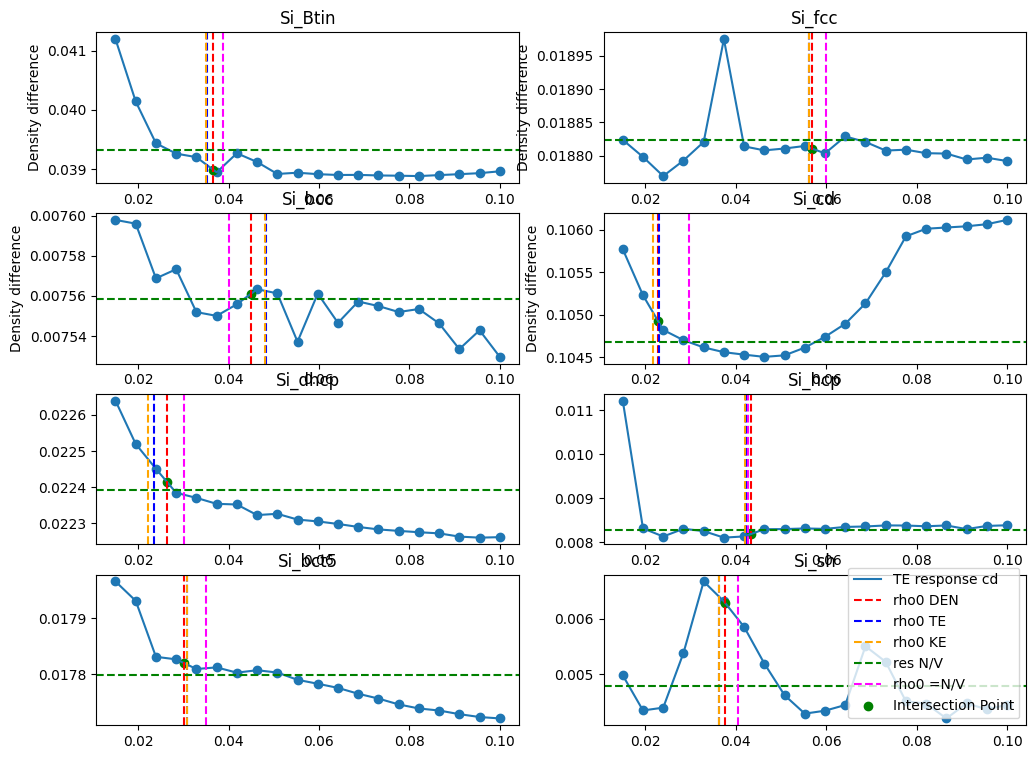

In [27]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(4,2, figsize=(12,9))
axs[0,0].scatter(rho0_KE_wt_cd, rho_diff_abs[0:20])
axs[0,1].scatter(rho0_KE_wt_cd, rho_diff_abs[20:40])
axs[1,0].scatter(rho0_KE_wt_cd, rho_diff_abs[40:60])
axs[1,1].scatter(rho0_KE_wt_cd, rho_diff_abs[60:80])
axs[2,0].scatter(rho0_KE_wt_cd, rho_diff_abs[80:100])
axs[2,1].scatter(rho0_KE_wt_cd, rho_diff_abs[100:120])
axs[3,0].scatter(rho0_KE_wt_cd, rho_diff_abs[120:140])
axs[3,1].scatter(rho0_KE_wt_cd, rho_diff_abs[140:160])

x_data = np.linspace(0.015,0.1,20)
rho_inter_Btin = np.interp(rho0_Btin_DEN_wt[10], x_data, rho_diff_abs[0:20])
rho_interp_Btin = (rho0_Btin_DEN_wt[10], rho_inter_Btin)
te_inter_Btin = np.interp(rho0_Btin_TE_wt[10], x_data, rho_diff_abs[0:20])
te_interp_Btin = (rho0_Btin_TE_wt[10], te_inter_Btin)
ke_inter_Btin = np.interp(rho0_Btin_KE_wt[10], x_data, rho_diff_abs[0:20])
ke_interp_Btin = (rho0_Btin_KE_wt[10], ke_inter_Btin)

rho_inter_fcc = np.interp(rho0_fcc_DEN_wt[10], x_data, rho_diff_abs[20:40])
rho_interp_fcc = (rho0_fcc_DEN_wt[10], rho_inter_fcc)
te_inter_fcc = np.interp(rho0_fcc_TE_wt[10], x_data, rho_diff_abs[20:40])
te_interp_fcc = (rho0_fcc_TE_wt[10], te_inter_fcc)
ke_inter_fcc = np.interp(rho0_fcc_KE_wt[10], x_data, rho_diff_abs[20:40])
ke_interp_fcc = (rho0_fcc_KE_wt[10], ke_inter_fcc)

rho_inter_bcc = np.interp(rho0_bcc_DEN_wt[10], x_data, rho_diff_abs[40:60])
rho_interp_bcc = (rho0_bcc_DEN_wt[10], rho_inter_bcc)
te_inter_bcc = np.interp(rho0_bcc_TE_wt[10], x_data, rho_diff_abs[40:60])
te_interp_bcc = (rho0_bcc_TE_wt[10], te_inter_bcc)
ke_inter_bcc = np.interp(rho0_bcc_KE_wt[10], x_data, rho_diff_abs[40:60])
ke_interp_bcc = (rho0_bcc_KE_wt[10], ke_inter_bcc)

rho_inter_cd = np.interp(rho0_cd_DEN_wt[10], x_data, rho_diff_abs[60:80])
rho_interp_cd = (rho0_cd_DEN_wt[10], rho_inter_cd)
te_inter_cd = np.interp(rho0_cd_TE_wt[10], x_data, rho_diff_abs[60:80])
te_interp_cd = (rho0_cd_TE_wt[10], te_inter_cd)
ke_inter_cd = np.interp(rho0_cd_KE_wt[10], x_data, rho_diff_abs[60:80])
ke_interp_cd = (rho0_cd_KE_wt[10], ke_inter_cd)

rho_inter_dhcp = np.interp(rho0_dhcp_DEN_wt[10], x_data, rho_diff_abs[80:100])
rho_interp_dhcp = (rho0_dhcp_DEN_wt[10], rho_inter_dhcp)
te_inter_dhcp = np.interp(rho0_dhcp_TE_wt[10], x_data, rho_diff_abs[80:100])
te_interp_dhcp = (rho0_dhcp_TE_wt[10], te_inter_dhcp)
ke_inter_dhcp = np.interp(rho0_dhcp_KE_wt[10], x_data, rho_diff_abs[80:100])
ke_interp_dhcp = (rho0_dhcp_KE_wt[10], ke_inter_dhcp)

rho_inter_hcp = np.interp(rho0_hcp_DEN_wt[10], x_data, rho_diff_abs[100:120])
rho_interp_hcp = (rho0_hcp_DEN_wt[10], rho_inter_hcp)
te_inter_hcp = np.interp(rho0_hcp_TE_wt[10], x_data, rho_diff_abs[100:120])
te_interp_hcp = (rho0_hcp_TE_wt[10], te_inter_hcp)
ke_inter_hcp = np.interp(rho0_hcp_KE_wt[10], x_data, rho_diff_abs[100:120])
ke_interp_hcp = (rho0_hcp_KE_wt[10], ke_inter_hcp)

rho_inter_bct5 = np.interp(rho0_bct5_DEN_wt[10], x_data, rho_diff_abs[120:140])
rho_interp_bct5 = (rho0_bct5_DEN_wt[10], rho_inter_bct5)
te_inter_bct5 = np.interp(rho0_bct5_TE_wt[10], x_data, rho_diff_abs[120:140])
te_interp_bct5 = (rho0_bct5_TE_wt[10], te_inter_bct5)
ke_inter_bct5 = np.interp(rho0_bct5_KE_wt[10], x_data, rho_diff_abs[120:140])
ke_interp_bct5 = (rho0_bct5_KE_wt[10], ke_inter_bct5)

rho_inter_sh = np.interp(rho0_sh_DEN_wt[10], x_data, rho_diff_abs[140:160])
rho_interp_sh = (rho0_sh_DEN_wt[10], rho_inter_sh)
te_inter_sh = np.interp(rho0_sh_TE_wt[10], x_data, rho_diff_abs[140:160])
te_interp_sh = (rho0_sh_TE_wt[10], te_inter_sh)
ke_inter_sh = np.interp(rho0_sh_KE_wt[10], x_data, rho_diff_abs[140:160])
ke_interp_sh = (rho0_sh_KE_wt[10], ke_inter_sh)


axs[0,0].plot(x_data, rho_diff_abs[0:20], label='TE response Btin')
axs[0,0].axvline(x=rho0_Btin_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[0,0].axvline(x=rho0_Btin_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[0,0].axvline(x=rho0_Btin_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[0,0].axhline(y=rho_diff_abs_nv[0], color='green', linestyle='--', label='res N/V')
axs[0,0].axvline(x=Rho_ini[0].mean(), color='magenta', linestyle='--', label='rho0 = N/V')

axs[0,0].scatter(*rho_interp_Btin, color='g', label='Intersection Point')

axs[0,1].plot(x_data, rho_diff_abs[20:40], label='TE response fcc')
axs[0,1].axvline(x=rho0_fcc_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[0,1].axvline(x=rho0_fcc_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[0,1].axvline(x=rho0_fcc_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[0,1].axhline(y=rho_diff_abs_nv[1], color='green', linestyle='--', label='res N/V')
axs[0,1].axvline(x=Rho_ini[1].mean(), color='magenta', linestyle='--', label='rho0 = N/V')
axs[0,1].scatter(*rho_interp_fcc, color='g', label='Intersection Point')


axs[1,0].plot(x_data, rho_diff_abs[40:60], label='TE response bcc')
axs[1,0].axvline(x=rho0_bcc_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[1,0].axvline(x=rho0_bcc_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[1,0].axvline(x=rho0_bcc_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[1,0].axhline(y=rho_diff_abs_nv[2], color='green', linestyle='--', label='res N/V')
axs[1,0].axvline(x=Rho_ini[2].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[1,0].scatter(*rho_interp_bcc, color='g', label='Intersection Point')

axs[1,1].plot(x_data, rho_diff_abs[60:80], label='TE response cd')
axs[1,1].axvline(x=rho0_cd_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[1,1].axvline(x=rho0_cd_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[1,1].axvline(x=rho0_cd_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[1,1].axhline(y=rho_diff_abs_nv[3], color='green', linestyle='--', label='res N/V')
axs[1,1].axvline(x=Rho_ini[3].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[1,1].scatter(*rho_interp_cd, color='g', label='Intersection Point')

axs[2,0].plot(x_data, rho_diff_abs[80:100], label='TE response cd')
axs[2,0].axvline(x=rho0_dhcp_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[2,0].axvline(x=rho0_dhcp_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[2,0].axvline(x=rho0_dhcp_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[2,0].axhline(y=rho_diff_abs_nv[4], color='green', linestyle='--', label='res N/V')
axs[2,0].axvline(x=Rho_ini[4].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[2,0].scatter(*rho_interp_dhcp, color='g', label='Intersection Point')

axs[2,1].plot(x_data, rho_diff_abs[100:120], label='TE response cd')
axs[2,1].axvline(x=rho0_hcp_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[2,1].axvline(x=rho0_hcp_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[2,1].axvline(x=rho0_hcp_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[2,1].axhline(y=rho_diff_abs_nv[5], color='green', linestyle='--', label='res N/V')
axs[2,1].axvline(x=Rho_ini[5].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[2,1].scatter(*rho_interp_hcp, color='g', label='Intersection Point')

axs[3,0].plot(x_data, rho_diff_abs[120:140], label='TE response cd')
axs[3,0].axvline(x=rho0_bct5_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[3,0].axvline(x=rho0_bct5_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[3,0].axvline(x=rho0_bct5_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[3,0].axhline(y=rho_diff_abs_nv[6], color='green', linestyle='--', label='res N/V')
axs[3,0].axvline(x=Rho_ini[6].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[3,0].scatter(*rho_interp_bct5, color='g', label='Intersection Point')

axs[3,1].plot(x_data, rho_diff_abs[140:160], label='TE response cd')
axs[3,1].axvline(x=rho0_sh_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[3,1].axvline(x=rho0_sh_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[3,1].axvline(x=rho0_sh_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[3,1].axhline(y=rho_diff_abs_nv[7], color='green', linestyle='--', label='res N/V')
axs[3,1].axvline(x=Rho_ini[7].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[3,1].scatter(*rho_interp_sh, color='g', label='Intersection Point')

axs[0,0].set_ylabel(r'Density difference')
axs[0,1].set_ylabel(r'Density difference')
axs[1,0].set_ylabel(r'Density difference')
axs[1,1].set_ylabel(r'Density difference')

axs[0,0].set_xlabel(r'$\rho_{0}$')
axs[0,1].set_xlabel(r'$\rho_{0}$')
axs[1,0].set_xlabel(r'$\rho_{0}$')
axs[1,1].set_xlabel(r'$\rho_{0}$')

axs[0,0].set_title(Phases[0])
axs[0,1].set_title(Phases[1])
axs[1,0].set_title(Phases[2])
axs[1,1].set_title(Phases[3])
axs[2,0].set_title(Phases[4])
axs[2,1].set_title(Phases[5])
axs[3,0].set_title(Phases[6])
axs[3,1].set_title(Phases[7])
plt.legend()

plt.show()

In [28]:
A =0.01

In [29]:
Phases = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_cd', 'Si_dhcp', 'Si_hcp', 'Si_bct5', 'Si_sh'] 

In [30]:
from tabulate import tabulate
## Energies wrt KS bcc energies
data = [
    ["Btin", ke_interp_Btin[1]/(A*4), te_interp_Btin[1]/(A*4), rho_interp_Btin[1]/(A*4), rho_diff_abs_nv[0]/(A*4), ks_rho_diff_k8[0]/(A*4)],
    ["bcc", ke_interp_bcc[1]/(A*2), te_interp_bcc[1]/(A*2), rho_interp_bcc[1]/(A*2), rho_diff_abs_nv[2]/(A*2), ks_rho_diff_k8[2]/(A*2)],
    ["fcc", ke_interp_fcc[1]/(A*4), te_interp_fcc[1]/(A*4), rho_interp_fcc[1]/(A*4), rho_diff_abs_nv[1]/(A*4), ks_rho_diff_k8[1]/(A*4)],
    ["cd", ke_interp_cd[1]/(A*8), te_interp_cd[1]/(A*8), rho_interp_cd[1]/(A*8), rho_diff_abs_nv[3]/(A*8), ks_rho_diff_k8[3]/(A*8)],
    ["dhcp", ke_interp_dhcp[1]/(A*4), te_interp_dhcp[1]/(A*4), rho_interp_dhcp[1]/(A*4), rho_diff_abs_nv[4]/(A*4), ks_rho_diff_k8[4]/(A*4)],
    ["hcp", ke_interp_hcp[1]/(A*2), te_interp_hcp[1]/(A*2), rho_interp_hcp[1]/(A*2), rho_diff_abs_nv[5]/(A*2), 0.008041762871711433/(A*2)],
    ["bct5", ke_interp_bct5[1]/(A*4), te_interp_bct5[1]/(A*4), rho_interp_bct5[1]/(A*4), rho_diff_abs_nv[6]/(A*4), ks_rho_diff_k8[5]/(A*4)],
    ["sh", ke_interp_sh[1]/(A*2), te_interp_sh[1]/(A*2), rho_interp_sh[1]/(A*2), rho_diff_abs_nv[7]/(A*2), ks_rho_diff_k8[6]/(A*2)],
    
]

table = tabulate(data, headers=[r"Density diff","Response \n rho0_KIN","Response \n rho0_TE","Response \n rho0_DEN", "Response \n N/V", "KS k=8"], tablefmt="grid")

print(table)

+----------------+-------------+-------------+-------------+-------------+----------+
| Density diff   |   Response  |   Response  |   Response  |   Response  |   KS k=8 |
|                |    rho0_KIN |     rho0_TE |    rho0_DEN |         N/V |          |
+================+=============+=============+=============+=============+==========+
| Btin           |    0.977116 |    0.976771 |    0.974725 |    0.983183 | 0.982727 |
+----------------+-------------+-------------+-------------+-------------+----------+
| bcc            |    0.378128 |    0.378123 |    0.378054 |    0.377927 | 0.388395 |
+----------------+-------------+-------------+-------------+-------------+----------+
| fcc            |    0.470299 |    0.470307 |    0.470259 |    0.470595 | 0.468664 |
+----------------+-------------+-------------+-------------+-------------+----------+
| cd             |    1.31274  |    1.3114   |    1.31151  |    1.30849  | 1.29935  |
+----------------+-------------+-------------+--------

In [31]:
# rho0_KE_wt_cd = np.linspace(0.015,0.1,20)
# rho_opt = []
# rho_vext = []
# toten_diff = []
# kin_diff = []
phase = []
for i,phase in enumerate(phase):
    print(phase)
#     for j in np.arange(0,20):
    ke = Functional(type='KEDF',name='WT', rho0= rho_interp_bct5[0])
    evaluator = TotalFunctional(KE=ke, XC=xc, HARTREE=hartree, PSEUDO=Pseudo[i])
    optimization_options = {'econv' : 1e-7}
    opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options,
            optimization_method = 'TN')

    Rho_opt = opt.optimize_rho(guess_rho=Rho_ini[i])
    rho_opt.append(Rho_opt)
    energy_opt = evaluator.Energy(rho=Rho_opt, ions=IONS[i])
    ke_opt = ke(Rho_opt).energy
    ### Total functional with vext


    totalfunctional_vext = TotalFunctional(KE=ke, XC=xc, HARTREE=hartree, PSEUDO=Pseudo[i], EXT = Vext[i])
    optimization_options = {
        'econv' : 1e-7, # Energy Convergence (a.u./atom)
        'maxfun' : 50,   # For TN method, it's the max steps for searching direction
        'maxiter' : 50, # The max steps for optimization
        }

    opt_vext = Optimization(EnergyEvaluator=totalfunctional_vext, optimization_options = optimization_options,
        optimization_method = 'TN')
    Rho_vext = opt_vext.optimize_rho(guess_rho=Rho_opt)
    energy_vext = totalfunctional_vext.Energy(rho=Rho_vext, ions=IONS[i])
    ke_vext = ke(Rho_vext).energy
    rho_vext.append(Rho_vext)
    toten_diff.append(energy_opt-energy_vext)
    kin_diff.append(ke_opt-ke_vext)

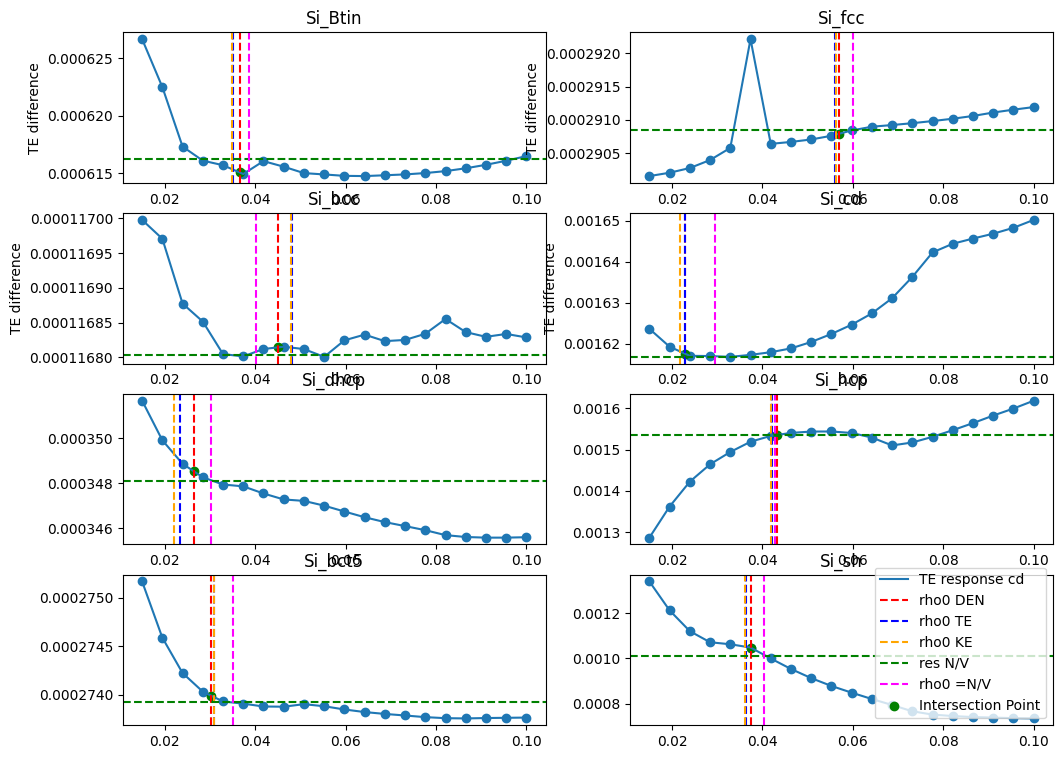

In [38]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(4,2, figsize=(12,9))
axs[0,0].scatter(rho0_KE_wt_cd, toten_diff[0:20])
axs[0,1].scatter(rho0_KE_wt_cd, toten_diff[20:40])
axs[1,0].scatter(rho0_KE_wt_cd, toten_diff[40:60])
axs[1,1].scatter(rho0_KE_wt_cd, toten_diff[60:80])
axs[2,0].scatter(rho0_KE_wt_cd, toten_diff[80:100])
axs[2,1].scatter(rho0_KE_wt_cd, toten_diff[100:120])
axs[3,0].scatter(rho0_KE_wt_cd, toten_diff[120:140])
axs[3,1].scatter(rho0_KE_wt_cd, toten_diff[140:160])

x_data = np.linspace(0.015,0.1,20)
rho_inter_Btin = np.interp(rho0_Btin_DEN_wt[10], x_data, toten_diff[0:20])
rho_interp_Btin = (rho0_Btin_DEN_wt[10], rho_inter_Btin)
te_inter_Btin = np.interp(rho0_Btin_TE_wt[10], x_data, toten_diff[0:20])
te_interp_Btin = (rho0_Btin_TE_wt[10], te_inter_Btin)
ke_inter_Btin = np.interp(rho0_Btin_KE_wt[10], x_data, toten_diff[0:20])
ke_interp_Btin = (rho0_Btin_KE_wt[10], ke_inter_Btin)

rho_inter_fcc = np.interp(rho0_fcc_DEN_wt[10], x_data, toten_diff[20:40])
rho_interp_fcc = (rho0_fcc_DEN_wt[10], rho_inter_fcc)
te_inter_fcc = np.interp(rho0_fcc_TE_wt[10], x_data, toten_diff[20:40])
te_interp_fcc = (rho0_fcc_TE_wt[10], te_inter_fcc)
ke_inter_fcc = np.interp(rho0_fcc_KE_wt[10], x_data, toten_diff[20:40])
ke_interp_fcc = (rho0_fcc_KE_wt[10], ke_inter_fcc)

rho_inter_bcc = np.interp(rho0_bcc_DEN_wt[10], x_data, toten_diff[40:60])
rho_interp_bcc = (rho0_bcc_DEN_wt[10], rho_inter_bcc)
te_inter_bcc = np.interp(rho0_bcc_TE_wt[10], x_data, toten_diff[40:60])
te_interp_bcc = (rho0_bcc_TE_wt[10], te_inter_bcc)
ke_inter_bcc = np.interp(rho0_bcc_KE_wt[10], x_data, toten_diff[40:60])
ke_interp_bcc = (rho0_bcc_KE_wt[10], ke_inter_bcc)

rho_inter_cd = np.interp(rho0_cd_DEN_wt[10], x_data, toten_diff[60:80])
rho_interp_cd = (rho0_cd_DEN_wt[10], rho_inter_cd)
te_inter_cd = np.interp(rho0_cd_TE_wt[10], x_data, toten_diff[60:80])
te_interp_cd = (rho0_cd_TE_wt[10], te_inter_cd)
ke_inter_cd = np.interp(rho0_cd_KE_wt[10], x_data, toten_diff[60:80])
ke_interp_cd = (rho0_cd_KE_wt[10], ke_inter_cd)

rho_inter_dhcp = np.interp(rho0_dhcp_DEN_wt[10], x_data, toten_diff[80:100])
rho_interp_dhcp = (rho0_dhcp_DEN_wt[10], rho_inter_dhcp)
te_inter_dhcp = np.interp(rho0_dhcp_TE_wt[10], x_data, toten_diff[80:100])
te_interp_dhcp = (rho0_dhcp_TE_wt[10], te_inter_dhcp)
ke_inter_dhcp = np.interp(rho0_dhcp_KE_wt[10], x_data, toten_diff[80:100])
ke_interp_dhcp = (rho0_dhcp_KE_wt[10], ke_inter_dhcp)

rho_inter_hcp = np.interp(rho0_hcp_DEN_wt[10], x_data, toten_diff[100:120])
rho_interp_hcp = (rho0_hcp_DEN_wt[10], rho_inter_hcp)
te_inter_hcp = np.interp(rho0_hcp_TE_wt[10], x_data, toten_diff[100:120])
te_interp_hcp = (rho0_hcp_TE_wt[10], te_inter_hcp)
ke_inter_hcp = np.interp(rho0_hcp_KE_wt[10], x_data, toten_diff[100:120])
ke_interp_hcp = (rho0_hcp_KE_wt[10], ke_inter_hcp)

rho_inter_bct5 = np.interp(rho0_bct5_DEN_wt[10], x_data, toten_diff[120:140])
rho_interp_bct5 = (rho0_bct5_DEN_wt[10], rho_inter_bct5)
te_inter_bct5 = np.interp(rho0_bct5_TE_wt[10], x_data, toten_diff[120:140])
te_interp_bct5 = (rho0_bct5_TE_wt[10], te_inter_bct5)
ke_inter_bct5 = np.interp(rho0_bct5_KE_wt[10], x_data, toten_diff[120:140])
ke_interp_bct5 = (rho0_bct5_KE_wt[10], ke_inter_bct5)

rho_inter_sh = np.interp(rho0_sh_DEN_wt[10], x_data, toten_diff[140:160])
rho_interp_sh = (rho0_sh_DEN_wt[10], rho_inter_sh)
te_inter_sh = np.interp(rho0_sh_TE_wt[10], x_data, toten_diff[140:160])
te_interp_sh = (rho0_sh_TE_wt[10], te_inter_sh)
ke_inter_sh = np.interp(rho0_sh_KE_wt[10], x_data, toten_diff[140:160])
ke_interp_sh = (rho0_sh_KE_wt[10], ke_inter_sh)


axs[0,0].plot(x_data, toten_diff[0:20], label='TE response Btin')
axs[0,0].axvline(x=rho0_Btin_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[0,0].axvline(x=rho0_Btin_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[0,0].axvline(x=rho0_Btin_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[0,0].axhline(y=toten_diff_nv[0], color='green', linestyle='--', label='res N/V')
axs[0,0].axvline(x=Rho_ini[0].mean(), color='magenta', linestyle='--', label='rho0 = N/V')

axs[0,0].scatter(*rho_interp_Btin, color='g', label='Intersection Point')

axs[0,1].plot(x_data, toten_diff[20:40], label='TE response fcc')
axs[0,1].axvline(x=rho0_fcc_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[0,1].axvline(x=rho0_fcc_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[0,1].axvline(x=rho0_fcc_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[0,1].axhline(y=toten_diff_nv[1], color='green', linestyle='--', label='res N/V')
axs[0,1].axvline(x=Rho_ini[1].mean(), color='magenta', linestyle='--', label='rho0 = N/V')
axs[0,1].scatter(*rho_interp_fcc, color='g', label='Intersection Point')


axs[1,0].plot(x_data, toten_diff[40:60], label='TE response bcc')
axs[1,0].axvline(x=rho0_bcc_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[1,0].axvline(x=rho0_bcc_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[1,0].axvline(x=rho0_bcc_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[1,0].axhline(y=toten_diff_nv[2], color='green', linestyle='--', label='res N/V')
axs[1,0].axvline(x=Rho_ini[2].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[1,0].scatter(*rho_interp_bcc, color='g', label='Intersection Point')

axs[1,1].plot(x_data, toten_diff[60:80], label='TE response cd')
axs[1,1].axvline(x=rho0_cd_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[1,1].axvline(x=rho0_cd_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[1,1].axvline(x=rho0_cd_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[1,1].axhline(y=toten_diff_nv[3], color='green', linestyle='--', label='res N/V')
axs[1,1].axvline(x=Rho_ini[3].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[1,1].scatter(*rho_interp_cd, color='g', label='Intersection Point')

axs[2,0].plot(x_data, toten_diff[80:100], label='TE response cd')
axs[2,0].axvline(x=rho0_dhcp_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[2,0].axvline(x=rho0_dhcp_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[2,0].axvline(x=rho0_dhcp_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[2,0].axhline(y=toten_diff_nv[4], color='green', linestyle='--', label='res N/V')
axs[2,0].axvline(x=Rho_ini[4].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[2,0].scatter(*rho_interp_dhcp, color='g', label='Intersection Point')

axs[2,1].plot(x_data, toten_diff[100:120], label='TE response cd')
axs[2,1].axvline(x=rho0_hcp_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[2,1].axvline(x=rho0_hcp_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[2,1].axvline(x=rho0_hcp_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[2,1].axhline(y=toten_diff_nv[5], color='green', linestyle='--', label='res N/V')
axs[2,1].axvline(x=Rho_ini[5].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[2,1].scatter(*rho_interp_hcp, color='g', label='Intersection Point')

axs[3,0].plot(x_data, toten_diff[120:140], label='TE response cd')
axs[3,0].axvline(x=rho0_bct5_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[3,0].axvline(x=rho0_bct5_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[3,0].axvline(x=rho0_bct5_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[3,0].axhline(y=toten_diff_nv[6], color='green', linestyle='--', label='res N/V')
axs[3,0].axvline(x=Rho_ini[6].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[3,0].scatter(*rho_interp_bct5, color='g', label='Intersection Point')

axs[3,1].plot(x_data, toten_diff[140:160], label='TE response cd')
axs[3,1].axvline(x=rho0_sh_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[3,1].axvline(x=rho0_sh_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[3,1].axvline(x=rho0_sh_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[3,1].axhline(y=toten_diff_nv[7], color='green', linestyle='--', label='res N/V')
axs[3,1].axvline(x=Rho_ini[7].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[3,1].scatter(*rho_interp_sh, color='g', label='Intersection Point')

axs[0,0].set_ylabel(r'TE difference')
axs[0,1].set_ylabel(r'TE difference')
axs[1,0].set_ylabel(r'TE difference')
axs[1,1].set_ylabel(r'TE difference')

axs[0,0].set_xlabel(r'$\rho_{0}$')
axs[0,1].set_xlabel(r'$\rho_{0}$')
axs[1,0].set_xlabel(r'$\rho_{0}$')
axs[1,1].set_xlabel(r'$\rho_{0}$')

axs[0,0].set_title(Phases[0])
axs[0,1].set_title(Phases[1])
axs[1,0].set_title(Phases[2])
axs[1,1].set_title(Phases[3])
axs[2,0].set_title(Phases[4])
axs[2,1].set_title(Phases[5])
axs[3,0].set_title(Phases[6])
axs[3,1].set_title(Phases[7])
plt.legend()

plt.show()


In [40]:
from tabulate import tabulate
## Energies wrt KS bcc energies
data = [
    ["Btin", ke_interp_Btin[1]/(A*4), te_interp_Btin[1]/(A*4), rho_interp_Btin[1]/(A*4), toten_diff_nv[0]/(A*4), ks_te_diff_k8[0]/(A*4)],
    ["bcc", ke_interp_bcc[1]/(A*2), te_interp_bcc[1]/(A*2), rho_interp_bcc[1]/(A*2), toten_diff_nv[2]/(A*2), ks_te_diff_k8[2]/(A*2)],
    ["fcc", ke_interp_fcc[1]/(A*4), te_interp_fcc[1]/(A*4), rho_interp_fcc[1]/(A*4), toten_diff_nv[1]/(A*4), ks_te_diff_k8[1]/(A*4)],
    ["hcp", ke_interp_hcp[1]/(A*2), te_interp_hcp[1]/(A*2), rho_interp_hcp[1]/(A*2), toten_diff_nv[5]/(A*2),0.00139629/(A*2)],
    ["bct5", ke_interp_bct5[1]/(A*4), te_interp_bct5[1]/(A*4), rho_interp_bct5[1]/(A*4), toten_diff_nv[6]/(A*4), ks_te_diff_k8[5]/(A*4)],
    ["sh", ke_interp_sh[1]/(A*1), te_interp_sh[1]/(A*1), rho_interp_sh[1]/(A*1), toten_diff_nv[7]/(A*1), ks_te_diff_k8[6]/(A*1)],
    ["cd", ke_interp_cd[1]/(A*8), te_interp_cd[1]/(A*8), rho_interp_cd[1]/(A*8), toten_diff_nv[3]/(A*8), ks_te_diff_k8[3]/(A*8)],
    ["dhcp", ke_interp_dhcp[1]/(A*4), te_interp_dhcp[1]/(A*4), rho_interp_dhcp[1]/(A*4), toten_diff_nv[4]/(A*4), ks_te_diff_k8[4]/(A*4)],
    
]

table = tabulate(data, headers=[r"TE diff","Response \n rho0_KIN","Response \n rho0_TE","Response \n rho0_DEN", "Response \n N/V", "KS k=8"], tablefmt="grid")

print(table)
print(tabulate(data, tablefmt="latex"))

+-----------+-------------+-------------+-------------+-------------+------------+
| TE diff   |   Response  |   Response  |   Response  |   Response  |     KS k=8 |
|           |    rho0_KIN |     rho0_TE |    rho0_DEN |         N/V |            |
+===========+=============+=============+=============+=============+============+
| Btin      |  0.0153837  |  0.0153826  |  0.0153766  |  0.0154061  | 0.015225   |
+-----------+-------------+-------------+-------------+-------------+------------+
| bcc       |  0.00584071 |  0.0058407  |  0.00584072 |  0.00584018 | 0.005824   |
+-----------+-------------+-------------+-------------+-------------+------------+
| fcc       |  0.00726944 |  0.00726938 |  0.00726973 |  0.0072713  | 0.00725375 |
+-----------+-------------+-------------+-------------+-------------+------------+
| hcp       |  0.076662   |  0.0766758  |  0.0767694  |  0.0767528  | 0.0698145  |
+-----------+-------------+-------------+-------------+-------------+------------+
| bc

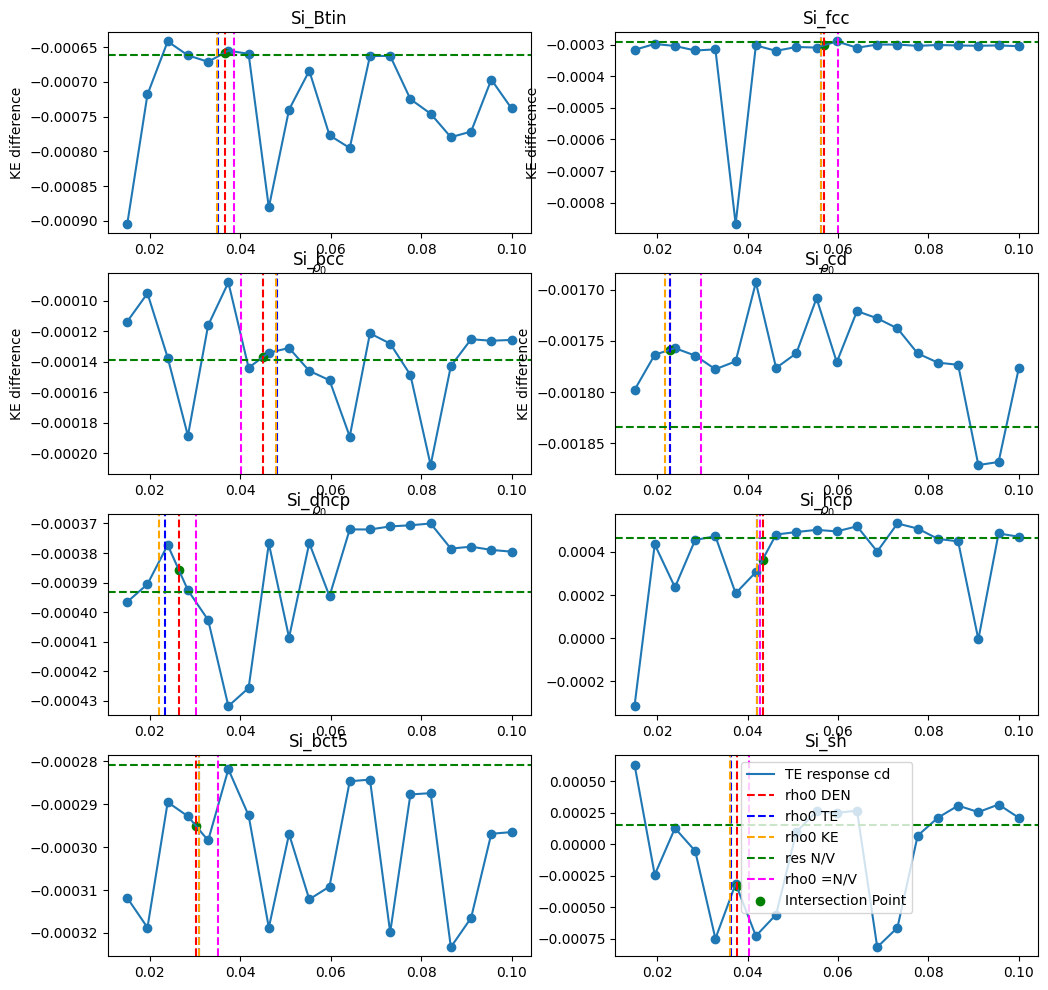

In [34]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(4,2, figsize=(12,12))
axs[0,0].scatter(rho0_KE_wt_cd, kin_diff[0:20])
axs[0,1].scatter(rho0_KE_wt_cd, kin_diff[20:40])
axs[1,0].scatter(rho0_KE_wt_cd, kin_diff[40:60])
axs[1,1].scatter(rho0_KE_wt_cd, kin_diff[60:80])
axs[2,0].scatter(rho0_KE_wt_cd, kin_diff[80:100])
axs[2,1].scatter(rho0_KE_wt_cd, kin_diff[100:120])
axs[3,0].scatter(rho0_KE_wt_cd, kin_diff[120:140])
axs[3,1].scatter(rho0_KE_wt_cd, kin_diff[140:160])

x_data = np.linspace(0.015,0.1,20)
rho_inter_Btin = np.interp(rho0_Btin_DEN_wt[10], x_data, kin_diff[0:20])
rho_interp_Btin = (rho0_Btin_DEN_wt[10], rho_inter_Btin)
te_inter_Btin = np.interp(rho0_Btin_TE_wt[10], x_data, kin_diff[0:20])
te_interp_Btin = (rho0_Btin_TE_wt[10], te_inter_Btin)
ke_inter_Btin = np.interp(rho0_Btin_KE_wt[10], x_data, kin_diff[0:20])
ke_interp_Btin = (rho0_Btin_KE_wt[10], ke_inter_Btin)

rho_inter_fcc = np.interp(rho0_fcc_DEN_wt[10], x_data, kin_diff[20:40])
rho_interp_fcc = (rho0_fcc_DEN_wt[10], rho_inter_fcc)
te_inter_fcc = np.interp(rho0_fcc_TE_wt[10], x_data, kin_diff[20:40])
te_interp_fcc = (rho0_fcc_TE_wt[10], te_inter_fcc)
ke_inter_fcc = np.interp(rho0_fcc_KE_wt[10], x_data, kin_diff[20:40])
ke_interp_fcc = (rho0_fcc_KE_wt[10], ke_inter_fcc)

rho_inter_bcc = np.interp(rho0_bcc_DEN_wt[10], x_data, kin_diff[40:60])
rho_interp_bcc = (rho0_bcc_DEN_wt[10], rho_inter_bcc)
te_inter_bcc = np.interp(rho0_bcc_TE_wt[10], x_data, kin_diff[40:60])
te_interp_bcc = (rho0_bcc_TE_wt[10], te_inter_bcc)
ke_inter_bcc = np.interp(rho0_bcc_KE_wt[10], x_data, kin_diff[40:60])
ke_interp_bcc = (rho0_bcc_KE_wt[10], ke_inter_bcc)

rho_inter_cd = np.interp(rho0_cd_DEN_wt[10], x_data, kin_diff[60:80])
rho_interp_cd = (rho0_cd_DEN_wt[10], rho_inter_cd)
te_inter_cd = np.interp(rho0_cd_TE_wt[10], x_data, kin_diff[60:80])
te_interp_cd = (rho0_cd_TE_wt[10], te_inter_cd)
ke_inter_cd = np.interp(rho0_cd_KE_wt[10], x_data, kin_diff[60:80])
ke_interp_cd = (rho0_cd_KE_wt[10], ke_inter_cd)

rho_inter_dhcp = np.interp(rho0_dhcp_DEN_wt[10], x_data, kin_diff[80:100])
rho_interp_dhcp = (rho0_dhcp_DEN_wt[10], rho_inter_dhcp)
te_inter_dhcp = np.interp(rho0_dhcp_TE_wt[10], x_data, kin_diff[80:100])
te_interp_dhcp = (rho0_dhcp_TE_wt[10], te_inter_dhcp)
ke_inter_dhcp = np.interp(rho0_dhcp_KE_wt[10], x_data, kin_diff[80:100])
ke_interp_dhcp = (rho0_dhcp_KE_wt[10], ke_inter_dhcp)

rho_inter_hcp = np.interp(rho0_hcp_DEN_wt[10], x_data, kin_diff[100:120])
rho_interp_hcp = (rho0_hcp_DEN_wt[10], rho_inter_hcp)
te_inter_hcp = np.interp(rho0_hcp_TE_wt[10], x_data, kin_diff[100:120])
te_interp_hcp = (rho0_hcp_TE_wt[10], te_inter_hcp)
ke_inter_hcp = np.interp(rho0_hcp_KE_wt[10], x_data, kin_diff[100:120])
ke_interp_hcp = (rho0_hcp_KE_wt[10], ke_inter_hcp)

rho_inter_bct5 = np.interp(rho0_bct5_DEN_wt[10], x_data, kin_diff[120:140])
rho_interp_bct5 = (rho0_bct5_DEN_wt[10], rho_inter_bct5)
te_inter_bct5 = np.interp(rho0_bct5_TE_wt[10], x_data, kin_diff[120:140])
te_interp_bct5 = (rho0_bct5_TE_wt[10], te_inter_bct5)
ke_inter_bct5 = np.interp(rho0_bct5_KE_wt[10], x_data, kin_diff[120:140])
ke_interp_bct5 = (rho0_bct5_KE_wt[10], ke_inter_bct5)

rho_inter_sh = np.interp(rho0_sh_DEN_wt[10], x_data, kin_diff[140:160])
rho_interp_sh = (rho0_sh_DEN_wt[10], rho_inter_sh)
te_inter_sh = np.interp(rho0_sh_TE_wt[10], x_data, kin_diff[140:160])
te_interp_sh = (rho0_sh_TE_wt[10], te_inter_sh)
ke_inter_sh = np.interp(rho0_sh_KE_wt[10], x_data, kin_diff[140:160])
ke_interp_sh = (rho0_sh_KE_wt[10], ke_inter_sh)


axs[0,0].plot(x_data, kin_diff[0:20], label='TE response Btin')
axs[0,0].axvline(x=rho0_Btin_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[0,0].axvline(x=rho0_Btin_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[0,0].axvline(x=rho0_Btin_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[0,0].axhline(y=kin_diff_nv[0], color='green', linestyle='--', label='res N/V')
axs[0,0].axvline(x=Rho_ini[0].mean(), color='magenta', linestyle='--', label='rho0 = N/V')

axs[0,0].scatter(*rho_interp_Btin, color='g', label='Intersection Point')

axs[0,1].plot(x_data, kin_diff[20:40], label='TE response fcc')
axs[0,1].axvline(x=rho0_fcc_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[0,1].axvline(x=rho0_fcc_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[0,1].axvline(x=rho0_fcc_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[0,1].axhline(y=kin_diff_nv[1], color='green', linestyle='--', label='res N/V')
axs[0,1].axvline(x=Rho_ini[1].mean(), color='magenta', linestyle='--', label='rho0 = N/V')
axs[0,1].scatter(*rho_interp_fcc, color='g', label='Intersection Point')


axs[1,0].plot(x_data, kin_diff[40:60], label='TE response bcc')
axs[1,0].axvline(x=rho0_bcc_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[1,0].axvline(x=rho0_bcc_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[1,0].axvline(x=rho0_bcc_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[1,0].axhline(y=kin_diff_nv[2], color='green', linestyle='--', label='res N/V')
axs[1,0].axvline(x=Rho_ini[2].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[1,0].scatter(*rho_interp_bcc, color='g', label='Intersection Point')

axs[1,1].plot(x_data, kin_diff[60:80], label='TE response cd')
axs[1,1].axvline(x=rho0_cd_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[1,1].axvline(x=rho0_cd_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[1,1].axvline(x=rho0_cd_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[1,1].axhline(y=kin_diff_nv[3], color='green', linestyle='--', label='res N/V')
axs[1,1].axvline(x=Rho_ini[3].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[1,1].scatter(*rho_interp_cd, color='g', label='Intersection Point')

axs[2,0].plot(x_data, kin_diff[80:100], label='TE response cd')
axs[2,0].axvline(x=rho0_dhcp_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[2,0].axvline(x=rho0_dhcp_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[2,0].axvline(x=rho0_dhcp_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[2,0].axhline(y=kin_diff_nv[4], color='green', linestyle='--', label='res N/V')
axs[2,0].axvline(x=Rho_ini[4].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[2,0].scatter(*rho_interp_dhcp, color='g', label='Intersection Point')

axs[2,1].plot(x_data, kin_diff[100:120], label='TE response cd')
axs[2,1].axvline(x=rho0_hcp_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[2,1].axvline(x=rho0_hcp_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[2,1].axvline(x=rho0_hcp_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[2,1].axhline(y=kin_diff_nv[5], color='green', linestyle='--', label='res N/V')
axs[2,1].axvline(x=Rho_ini[5].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[2,1].scatter(*rho_interp_hcp, color='g', label='Intersection Point')

axs[3,0].plot(x_data, kin_diff[120:140], label='TE response cd')
axs[3,0].axvline(x=rho0_bct5_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[3,0].axvline(x=rho0_bct5_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[3,0].axvline(x=rho0_bct5_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[3,0].axhline(y=kin_diff_nv[6], color='green', linestyle='--', label='res N/V')
axs[3,0].axvline(x=Rho_ini[6].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[3,0].scatter(*rho_interp_bct5, color='g', label='Intersection Point')

axs[3,1].plot(x_data, kin_diff[140:160], label='TE response cd')
axs[3,1].axvline(x=rho0_sh_DEN_wt[10], color='r', linestyle='--', label='rho0 DEN')
axs[3,1].axvline(x=rho0_sh_TE_wt[10], color='b', linestyle='--', label='rho0 TE')
axs[3,1].axvline(x=rho0_sh_KE_wt[10], color='orange', linestyle='--', label='rho0 KE')
axs[3,1].axhline(y=kin_diff_nv[7], color='green', linestyle='--', label='res N/V')
axs[3,1].axvline(x=Rho_ini[7].mean(), color='magenta', linestyle='--', label='rho0 =N/V')
axs[3,1].scatter(*rho_interp_sh, color='g', label='Intersection Point')

axs[0,0].set_ylabel(r'KE difference')
axs[0,1].set_ylabel(r'KE difference')
axs[1,0].set_ylabel(r'KE difference')
axs[1,1].set_ylabel(r'KE difference')

axs[0,0].set_xlabel(r'$\rho_{0}$')
axs[0,1].set_xlabel(r'$\rho_{0}$')
axs[1,0].set_xlabel(r'$\rho_{0}$')
axs[1,1].set_xlabel(r'$\rho_{0}$')

axs[0,0].set_title(Phases[0])
axs[0,1].set_title(Phases[1])
axs[1,0].set_title(Phases[2])
axs[1,1].set_title(Phases[3])
axs[2,0].set_title(Phases[4])
axs[2,1].set_title(Phases[5])
axs[3,0].set_title(Phases[6])
axs[3,1].set_title(Phases[7])
plt.legend()

plt.show()


In [41]:
from tabulate import tabulate
## Energies wrt KS bcc energies
data = [
    ["Btin", ke_interp_Btin[1]/(A*4), te_interp_Btin[1]/(A*4), rho_interp_Btin[1]/(A*4), kin_diff_nv[0]/(A*4), ks_ke_diff_k8[0]/(A*4*2)],
    ["bcc", ke_interp_bcc[1]/(A*2), te_interp_bcc[1]/(A*2), rho_interp_bcc[1]/(A*2), kin_diff_nv[2]/(A*2), ks_ke_diff_k8[2]/(A*2*2)],
    ["fcc", ke_interp_fcc[1]/(A*4), te_interp_fcc[1]/(A*4), rho_interp_fcc[1]/(A*4), kin_diff_nv[1]/(A*4), ks_ke_diff_k8[1]/(A*4*2)],
    ["hcp", ke_interp_hcp[1]/(A*2), te_interp_hcp[1]/(A*2), rho_interp_hcp[1]/(A*2), kin_diff_nv[5]/(A*2), 0.00099852/(A*2*2)],
    ["bct5", ke_interp_bct5[1]/(A*4), te_interp_bct5[1]/(A*4), rho_interp_bct5[1]/(A*4), kin_diff_nv[6]/(A*4), ks_ke_diff_k8[5]/(A*4*2)],
    ["sh", ke_interp_sh[1]/(A*1), te_interp_sh[1]/(A*1), rho_interp_sh[1]/(A*1), kin_diff_nv[7]/(A*1), ks_ke_diff_k8[6]/(A*1*2)],
    ["cd", ke_interp_cd[1]/(A*8), te_interp_cd[1]/(A*8), rho_interp_cd[1]/(A*8), kin_diff_nv[3]/(A*8), ks_ke_diff_k8[3]/(A*8*2)],
    ["dhcp", ke_interp_dhcp[1]/(A*4), te_interp_dhcp[1]/(A*4), rho_interp_dhcp[1]/(A*4), kin_diff_nv[4]/(A*4), ks_ke_diff_k8[4]/(A*4*2)],
    
]

table = tabulate(data, headers=[r"KE diff","Response \n rho0_KIN","Response \n rho0_TE","Response \n rho0_DEN", "Response \n N/V", "KS k=8"], tablefmt="grid")

print(table)
print(tabulate(data, tablefmt="latex"))

+-----------+-------------+-------------+-------------+-------------+-------------+
| KE diff   |   Response  |   Response  |   Response  |   Response  |      KS k=8 |
|           |    rho0_KIN |     rho0_TE |    rho0_DEN |         N/V |             |
+===========+=============+=============+=============+=============+=============+
| Btin      |  0.0153837  |  0.0153826  |  0.0153766  | -0.0165425  | -0.0157256  |
+-----------+-------------+-------------+-------------+-------------+-------------+
| bcc       |  0.00584071 |  0.0058407  |  0.00584072 | -0.00696171 | -0.0058065  |
+-----------+-------------+-------------+-------------+-------------+-------------+
| fcc       |  0.00726944 |  0.00726938 |  0.00726973 | -0.00727228 | -0.00720287 |
+-----------+-------------+-------------+-------------+-------------+-------------+
| hcp       |  0.076662   |  0.0766758  |  0.0767694  |  0.0233015  |  0.024963   |
+-----------+-------------+-------------+-------------+-------------+-------

In [ ]:
 Btin & -0.0165995  & -0.0165782  & -0.0164513  & -0.0165425  & -0.0157256  \\
 bcc  & -0.00665078 & -0.00664282 & -0.00685547 & -0.00696171 & -0.0058065  \\
 fcc  & -0.00762785 & -0.00764261 & -0.00755827 & -0.00727228 & -0.00720287 \\
 hcp  &  0.0156279  &  0.0159595  &  0.0182042  &  0.0233015  &  0.049926   \\
 bct5 & -0.00739816 & -0.0073974  & -0.00737703 & -0.00701803 & -0.00723704 \\
 sh   & -0.0429456  & -0.0412945  & -0.0332013  &  0.0154655  &  0.00556336 \\
 cd   & -0.022003   & -0.0219817  & -0.0219834  & -0.0229245  & -0.0214352  \\
 dhcp & -0.00956676 & -0.00946875 & -0.00964078 & -0.00983325 & -0.00860112 \\